
## Time Series GPTs

* UCI Time series data 



## Libraries


In [1]:

## !pip install pandas
## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend
## !pip install fastdtw



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
## from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR
import json
import os
import copy




In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

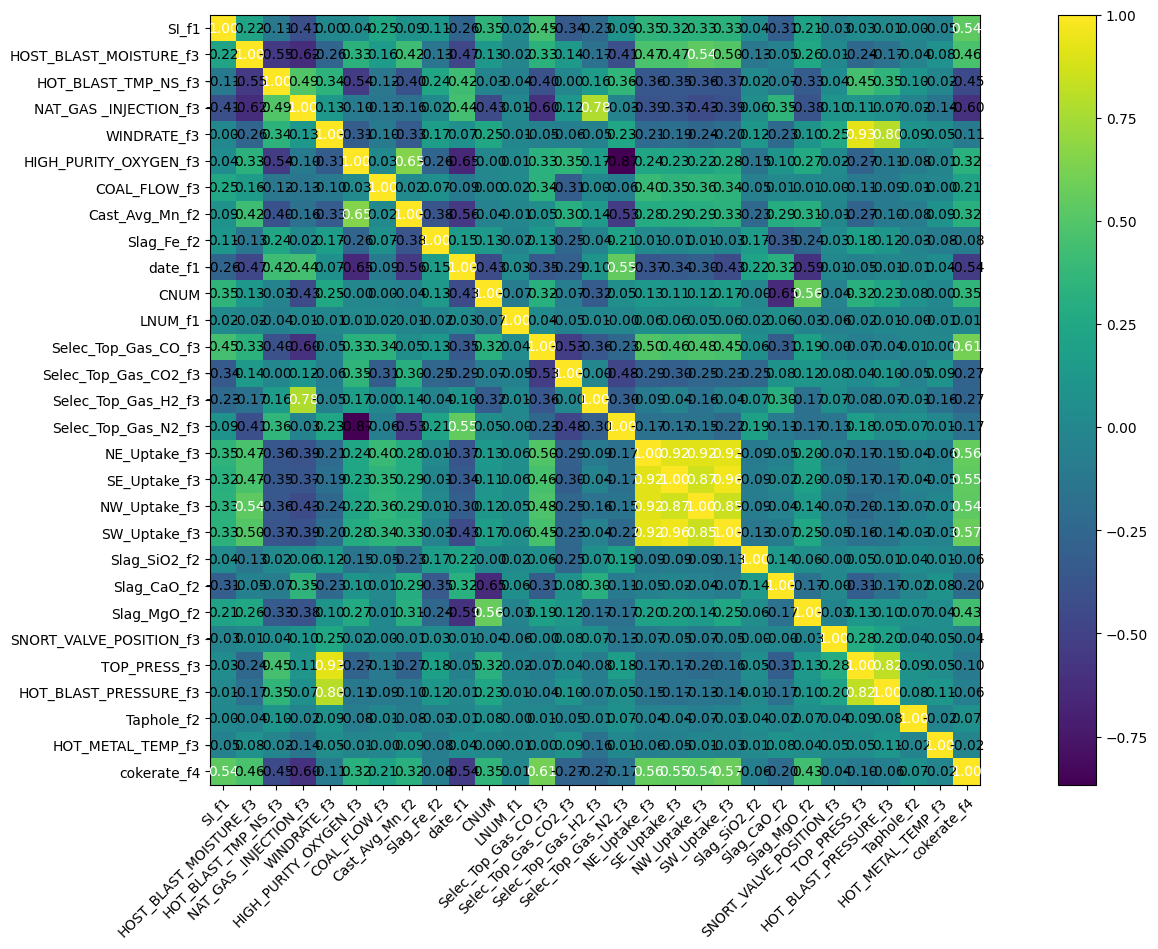

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## UCI data


In [15]:

## tsDataWrangling_obj.read_UCI_data()


In [16]:

## tsDataWrangling_obj.UCI_Energy_data_df 


In [17]:

## tsDataWrangling_obj.format_appliances_data_to_match_CIVS()


In [18]:

## tsDataWrangling_obj.UCI_Energy_data_df


In [19]:

## print(list(tsDataWrangling_obj.UCI_Energy_data_df.columns))   


In [20]:

## tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.UCI_Energy_data_df



## Correlation Matrix


In [21]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI','mov_avg_SI','SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3', 'COAL_FLOW_f3', 
                        'Cast_Avg_Mn_f2', 'Slag_Fe_f2',  'CNUM',  'Selec_Top_Gas_CO_f3',
                        'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 
                        'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 'Slag_SiO2_f2', 'Slag_CaO_f2', 
                        'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 'HOT_BLAST_PRESSURE_f3', 
                        'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [22]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

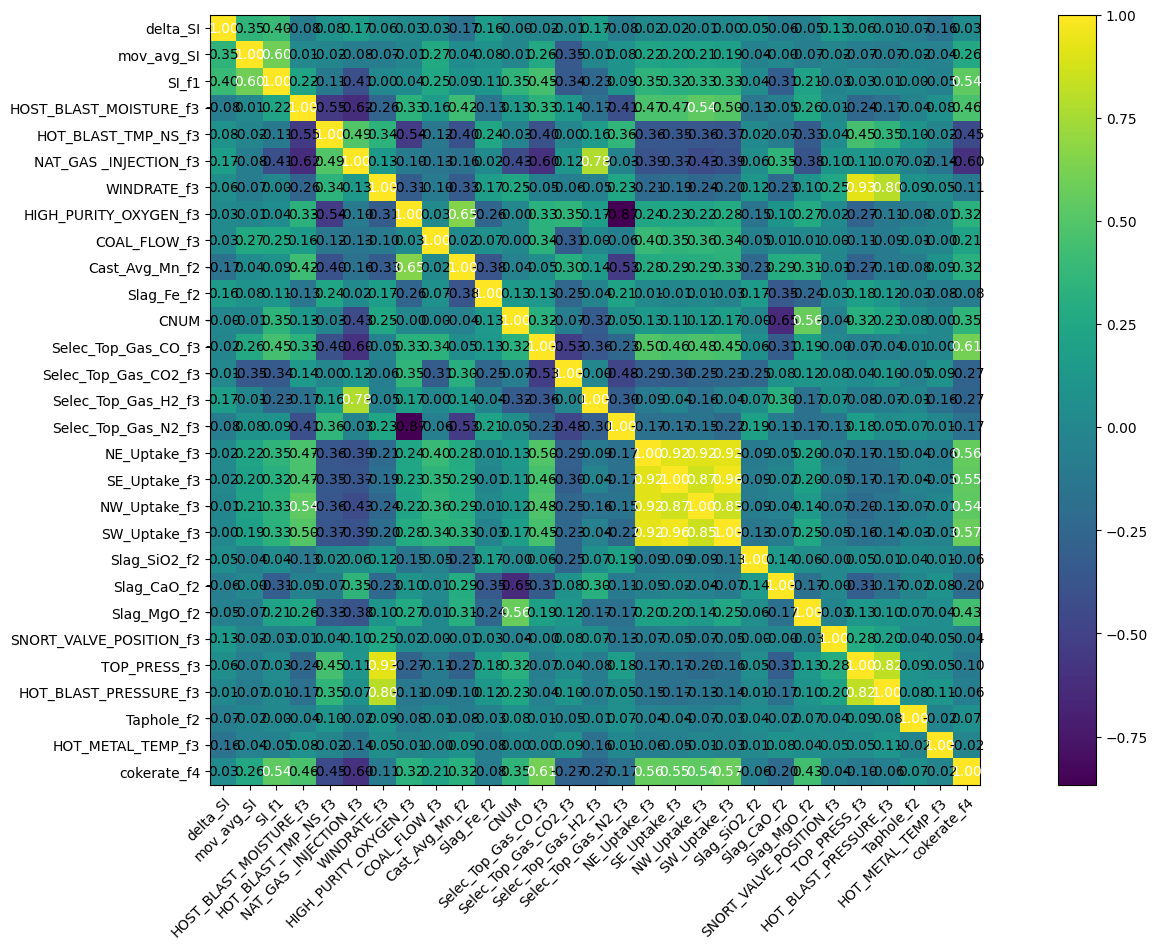

In [23]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [24]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [25]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [26]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [27]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [28]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [29]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        ## loss_SI     = F.mse_loss(    pred_si, y_si   )
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        ## loss_total  = alpha * loss_SI + (1 - alpha) * loss_all 
        
        ## alpha      = 0.9
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        ###################################################################################
        
        which_last = -1    ## -1 for 10, -3 for 8
        
        main_loss       = criterion(idx_pred[:, :], yb[:, :])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, which_last])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 50 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
        
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled





## Train on Train, Test on Test


In [30]:

inferenceGPT_obj.initialize_preds_lists()
inferenceGPT_obj.DPO_initialize_preds_lists()



## Run 1


In [31]:

( 
  chunk400to500_train, 
  chunk300to500_train, 
  chunk200to500_train, 
  chunk100to500_train, 
  chunk000to500_train, 
  test_CIVS
) = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.221015
Loss_SI: 1.2301347255706787 Loss_all: 1.2149680852890015
===
[50] Train Loss: 0.357283
Loss_SI: 0.48572856187820435 Loss_all: 0.34893444180488586
===


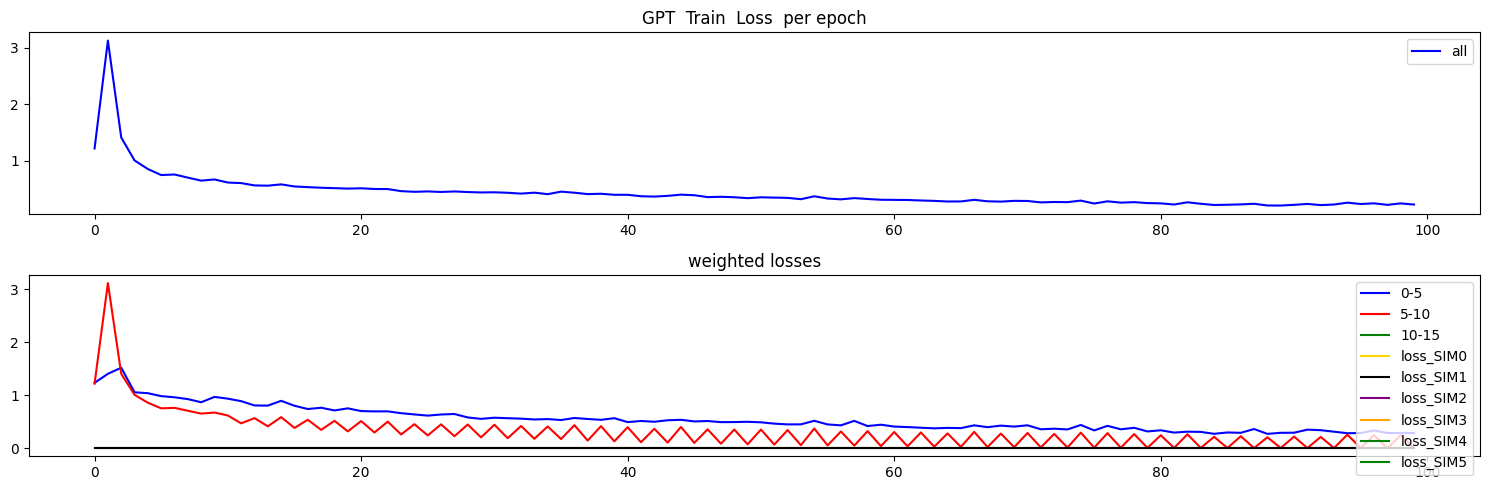

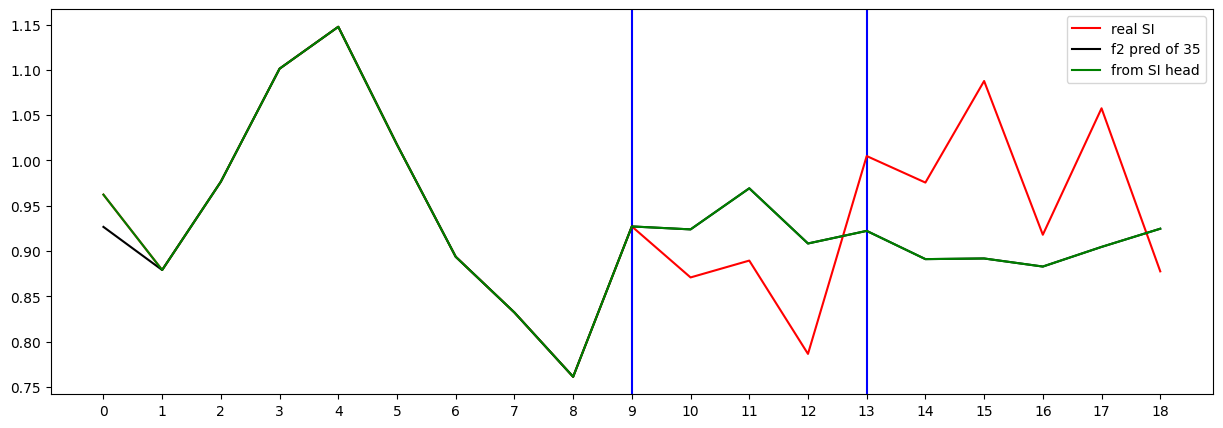

Testing R**2 - (all) - (no inputs):  0.9976867290782102
Testing R**2 - (f2) - SI full (no inputs):  -0.672269408757606
Testing R**2 - SI head only (no inputs):  -0.672269408757606
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  -0.2695161410558886
1 ...index R**2 (no inputs):  -1.1311069668875757
2 ...index R**2 (no inputs):  -0.672269408757606
3 ...index R**2 (no inputs):  -0.0066087591793531075
4 ...index R**2 (no inputs):  -6.9446933278789365
5 ...index R**2 (no inputs):  -0.9601660926644306
6 ...index R**2 (no inputs):  -0.0038816808860235863
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...

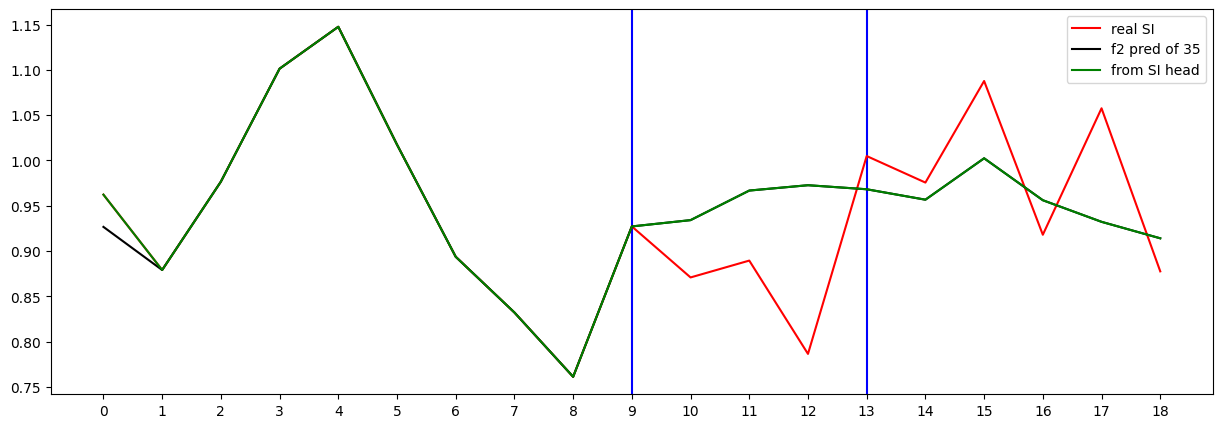

Testing R**2 - (all) - (no inputs):  0.9989982679675027
Testing R**2 - (f2) - SI full (no inputs):  -0.0630412118987862
Testing R**2 - SI head only (no inputs):  -0.0630412118987862
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  -0.43270967618161515
1 ...index R**2 (no inputs):  -0.28510062300482875
2 ...index R**2 (no inputs):  -0.0630412118987862
3 ...index R**2 (no inputs):  -0.8945498825802589
4 ...index R**2 (no inputs):  -7.385320314705854
5 ...index R**2 (no inputs):  0.16643484401088393
6 ...index R**2 (no inputs):  -0.18918926986908224
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...i

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk400to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 

res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42( chunk400to500_train, test_CIVS, model_DPO , x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.276945
Loss_SI: 1.1314810514450073 Loss_all: 1.271016001701355
===
[50] Train Loss: 0.428942
Loss_SI: 0.6895117163658142 Loss_all: 0.42384234070777893
===


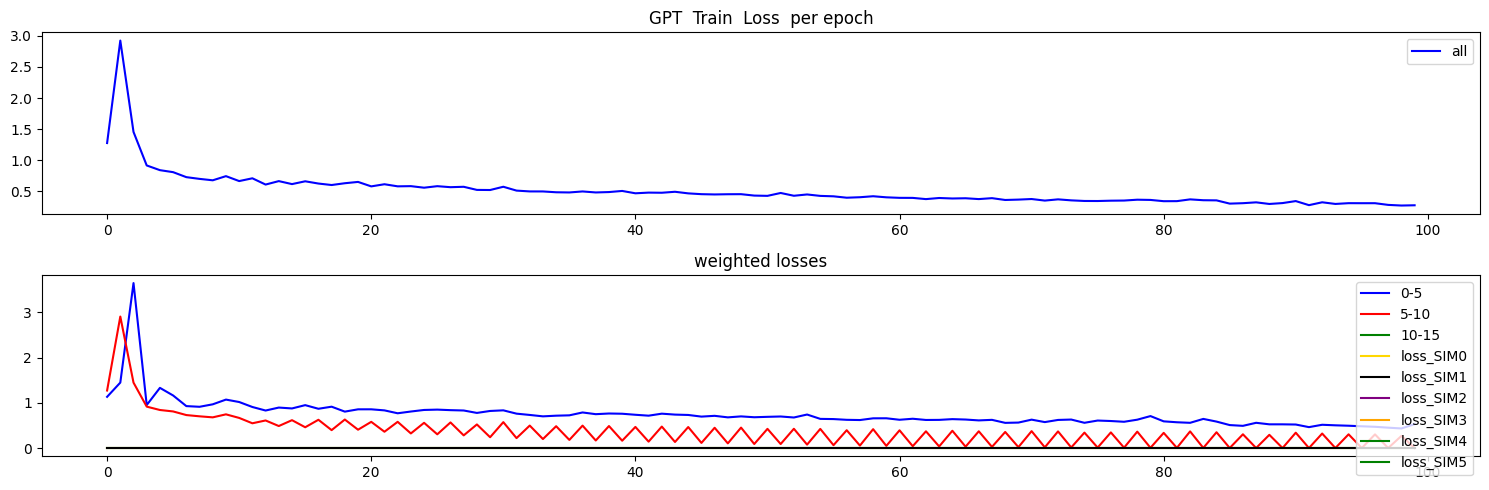

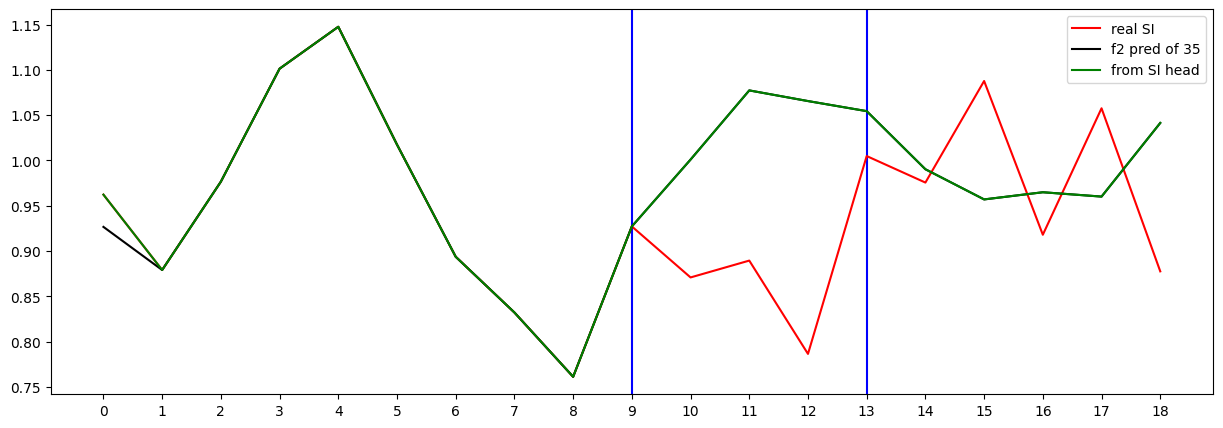

Testing R**2 - (all) - (no inputs):  0.9983466519613405
Testing R**2 - (f2) - SI full (no inputs):  -0.9656676366598076
Testing R**2 - SI head only (no inputs):  -0.9656676366598076
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  -0.23112326517306458
1 ...index R**2 (no inputs):  -1.612456422913768
2 ...index R**2 (no inputs):  -0.9656676366598076
3 ...index R**2 (no inputs):  -2.344967422217632
4 ...index R**2 (no inputs):  -1.699362399370563
5 ...index R**2 (no inputs):  -0.38188977264160395
6 ...index R**2 (no inputs):  -0.1730752607011432
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...inde

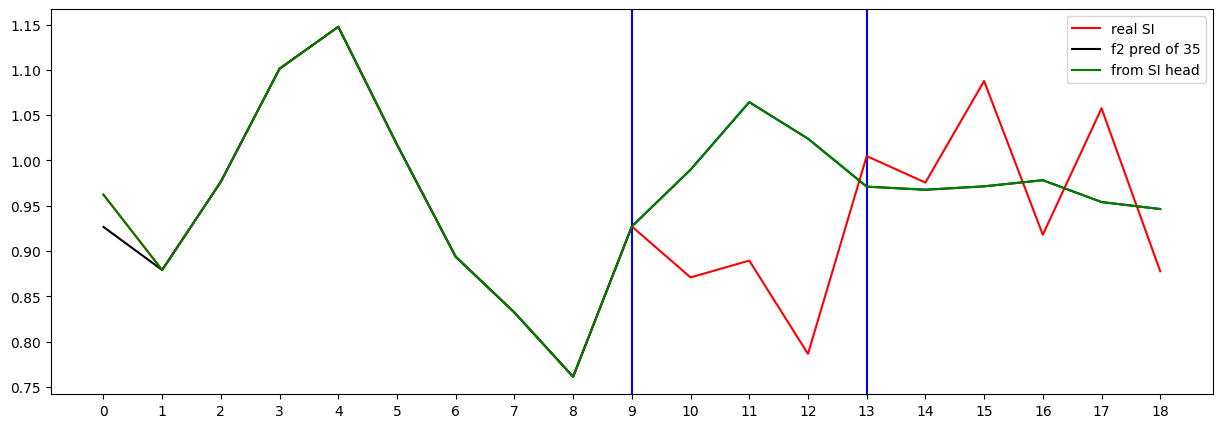

Testing R**2 - (all) - (no inputs):  0.9966138999837472
Testing R**2 - (f2) - SI full (no inputs):  -0.6527380792498805
Testing R**2 - SI head only (no inputs):  -0.6527380792498805
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  -0.28473403060576463
1 ...index R**2 (no inputs):  -1.8173187345178832
2 ...index R**2 (no inputs):  -0.6527380792498805
3 ...index R**2 (no inputs):  -0.09087349831479918
4 ...index R**2 (no inputs):  -2.851188472462326
5 ...index R**2 (no inputs):  -1.8681512768593826
6 ...index R**2 (no inputs):  -0.19833669967986656
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...i

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to500_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.211185
Loss_SI: 1.2261412143707275 Loss_all: 1.2058016061782837
===
[50] Train Loss: 0.411854
Loss_SI: 0.659808337688446 Loss_all: 0.4074549078941345
===


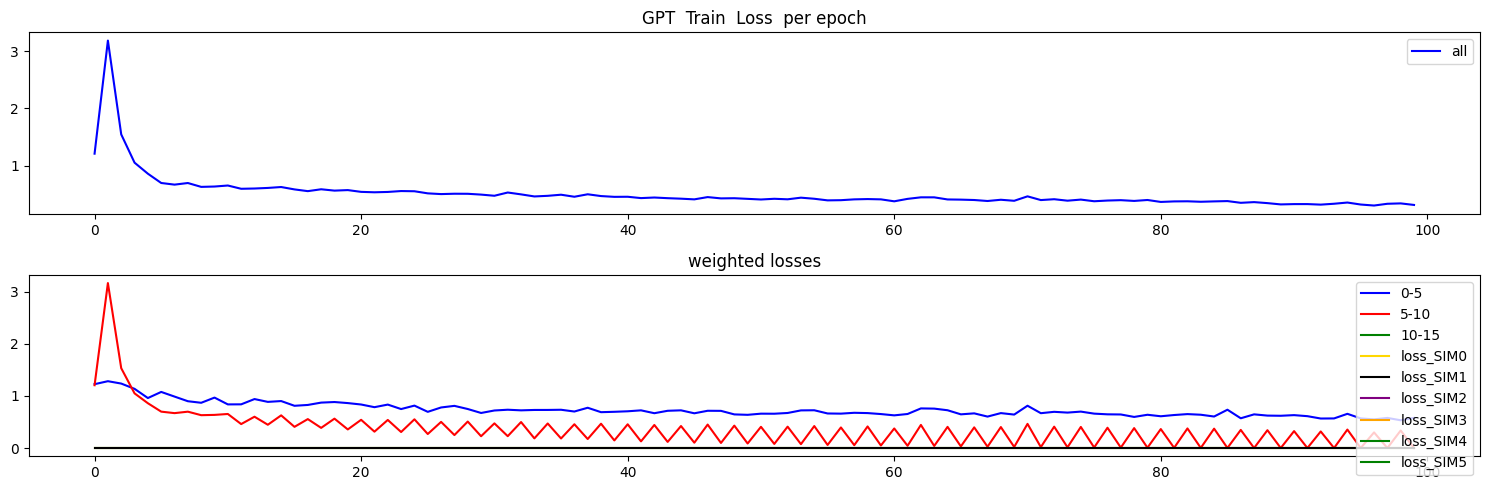

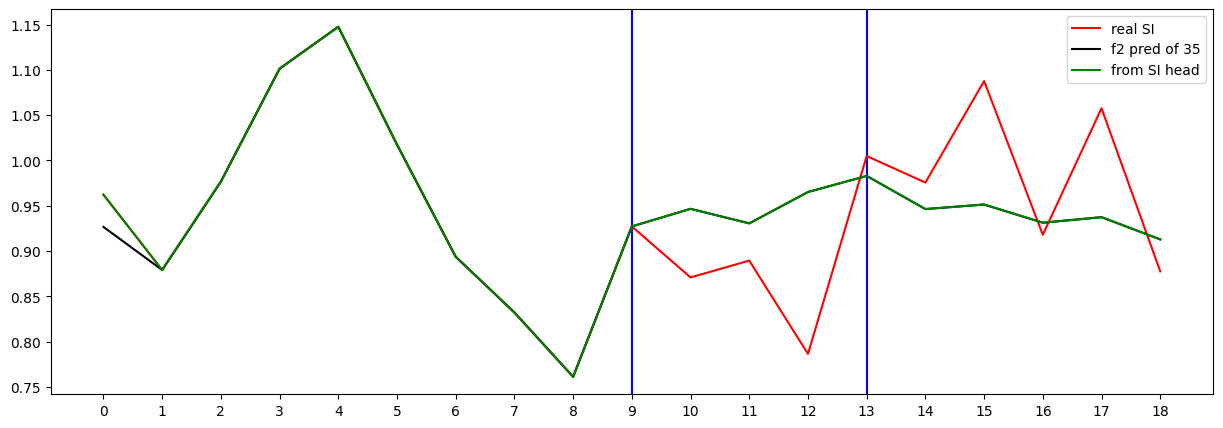

Testing R**2 - (all) - (no inputs):  0.9992848327217635
Testing R**2 - (f2) - SI full (no inputs):  0.032379846290908065
Testing R**2 - SI head only (no inputs):  0.032379846290908065
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  -0.2182206235379529
1 ...index R**2 (no inputs):  -0.614988878888582
2 ...index R**2 (no inputs):  0.032379846290908065
3 ...index R**2 (no inputs):  0.7713745134010874
4 ...index R**2 (no inputs):  -4.452081073132341
5 ...index R**2 (no inputs):  0.41634619563993414
6 ...index R**2 (no inputs):  -0.22185157150115487
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...in

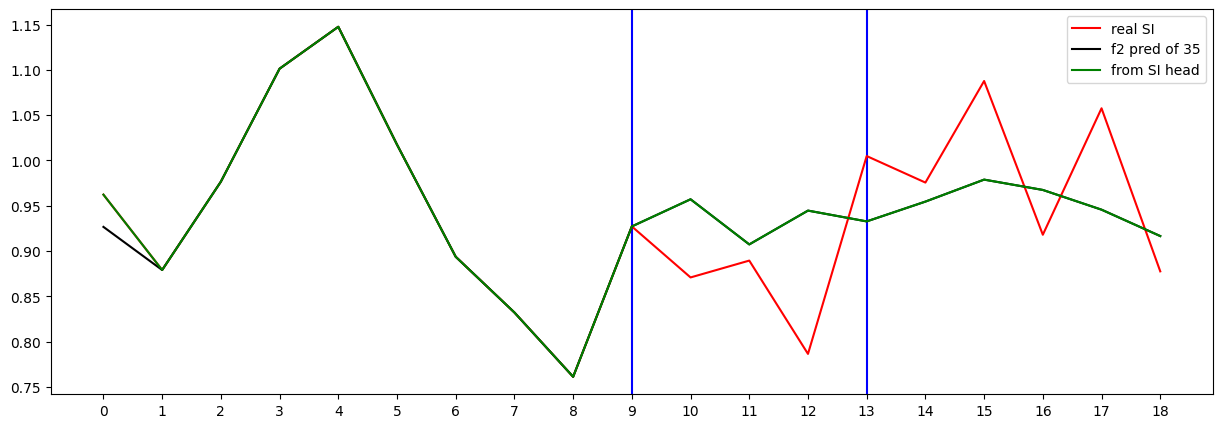

Testing R**2 - (all) - (no inputs):  0.9968190446261326
Testing R**2 - (f2) - SI full (no inputs):  0.1420215034569342
Testing R**2 - SI head only (no inputs):  0.1420215034569342
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  0.17695566676073682
1 ...index R**2 (no inputs):  -0.39537661896780185
2 ...index R**2 (no inputs):  0.1420215034569342
3 ...index R**2 (no inputs):  -2.4300646215741457
4 ...index R**2 (no inputs):  -4.3058572989424055
5 ...index R**2 (no inputs):  -1.6860382842726507
6 ...index R**2 (no inputs):  -0.6383403954483577
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs, 9  )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.520137
Loss_SI: 1.5796011686325073 Loss_all: 1.5143078565597534
===
[50] Train Loss: 0.413001
Loss_SI: 0.5557847023010254 Loss_all: 0.40886613726615906
===


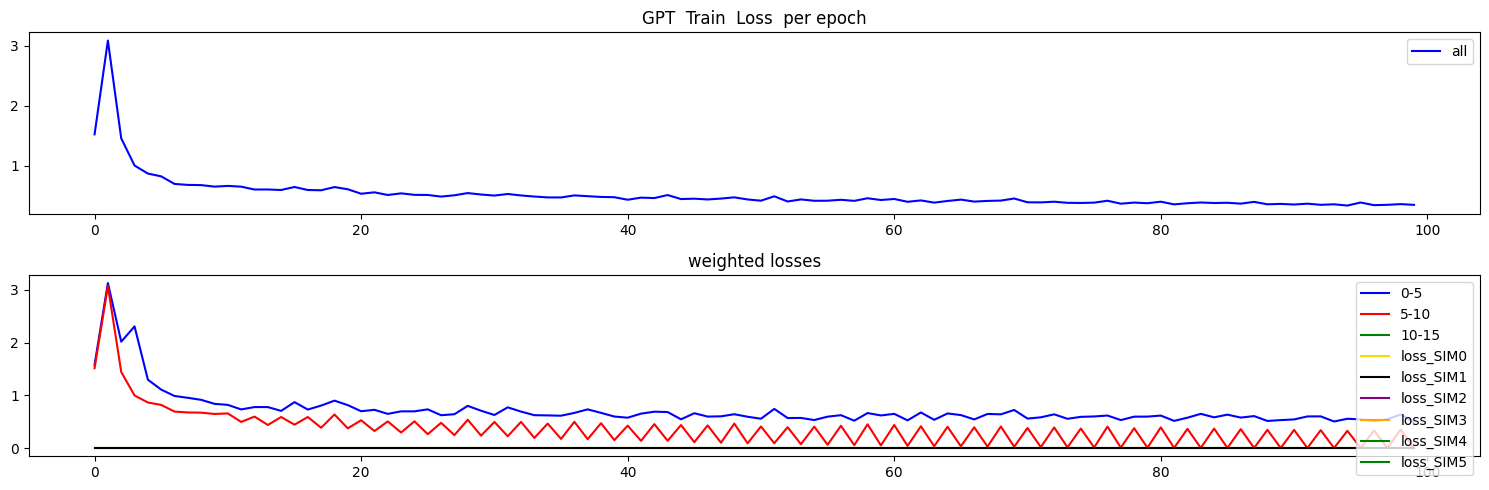

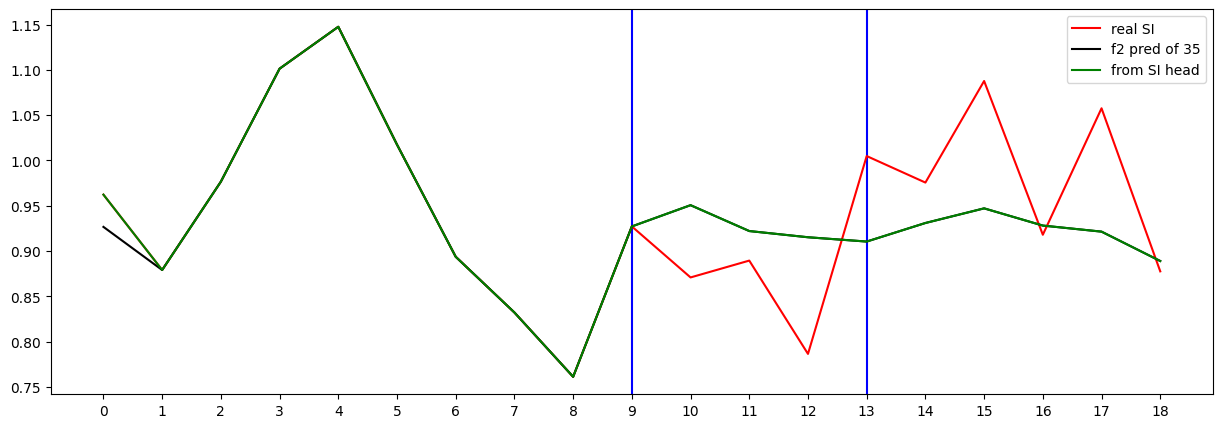

Testing R**2 - (all) - (no inputs):  0.99796704717976
Testing R**2 - (f2) - SI full (no inputs):  -0.18100877395794535
Testing R**2 - SI head only (no inputs):  -0.18100877395794535
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  -0.2533212754277039
1 ...index R**2 (no inputs):  -0.28211299365691
2 ...index R**2 (no inputs):  -0.18100877395794535
3 ...index R**2 (no inputs):  0.5262067854996533
4 ...index R**2 (no inputs):  -2.4317469096168605
5 ...index R**2 (no inputs):  -0.5877967991025661
6 ...index R**2 (no inputs):  0.16554675774102812
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index

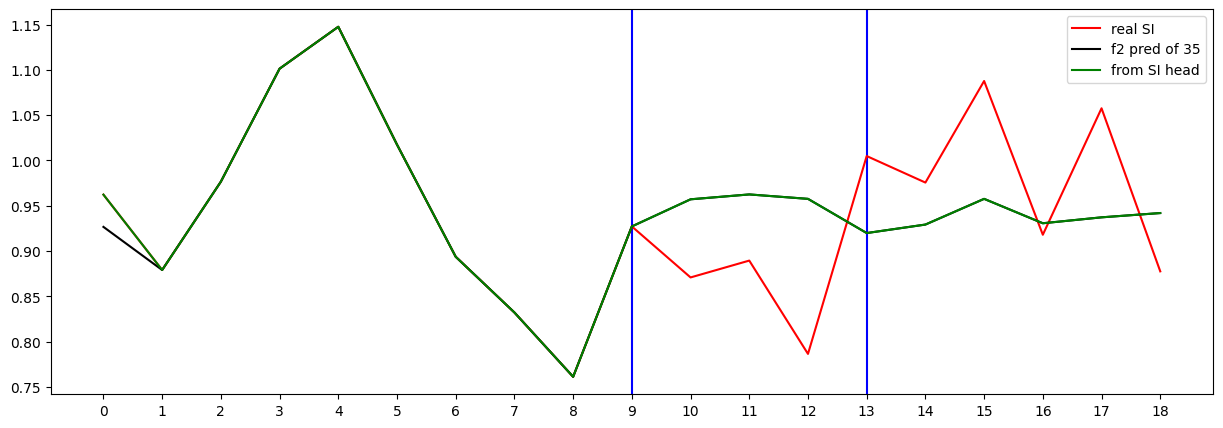

Testing R**2 - (all) - (no inputs):  0.9982624882841955
Testing R**2 - (f2) - SI full (no inputs):  -0.23428818135503993
Testing R**2 - SI head only (no inputs):  -0.23428818135503993
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  -0.25604493006161544
1 ...index R**2 (no inputs):  -0.32425283700887664
2 ...index R**2 (no inputs):  -0.23428818135503993
3 ...index R**2 (no inputs):  0.32744689540401006
4 ...index R**2 (no inputs):  -1.6614582828404014
5 ...index R**2 (no inputs):  -0.3831574595993681
6 ...index R**2 (no inputs):  0.09164590831937725
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 .

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to500_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )
    
    
    

[0] Train Loss: 1.187308
Loss_SI: 1.0035995244979858 Loss_all: 1.1817126274108887
===
[50] Train Loss: 0.453147
Loss_SI: 0.7717488408088684 Loss_all: 0.4499199092388153
===


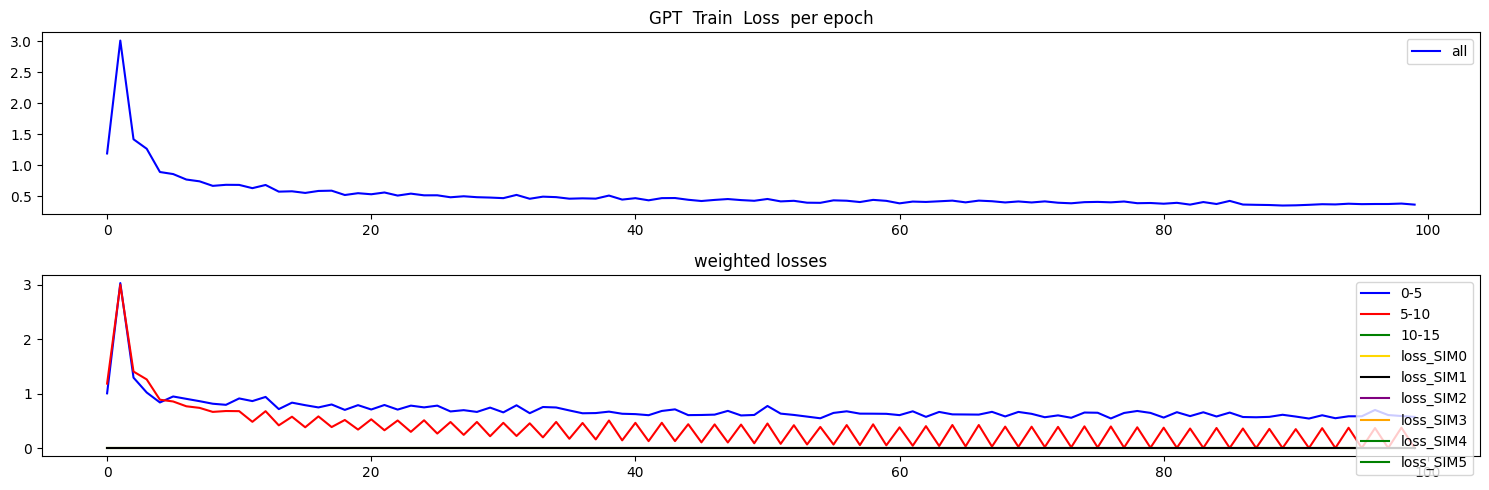

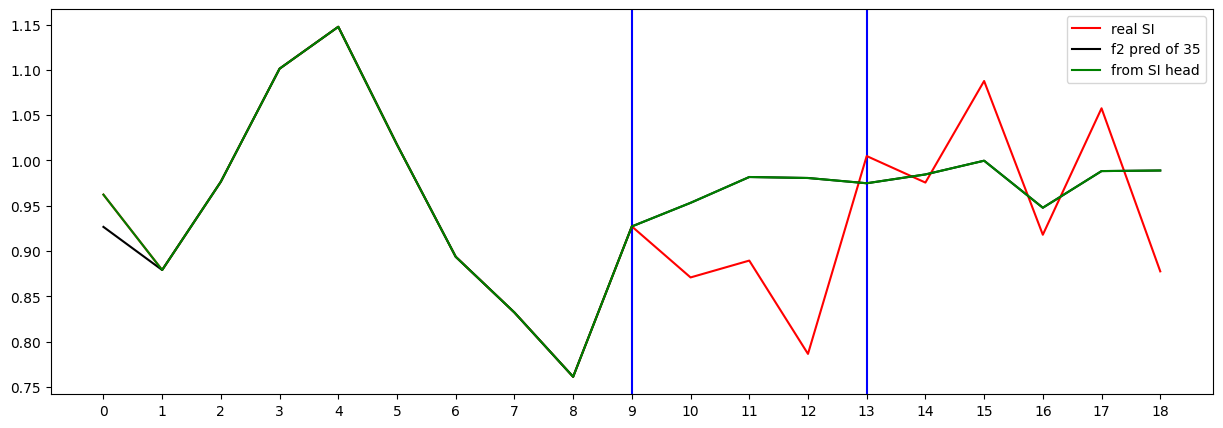

Testing R**2 - (all) - (no inputs):  0.9979700670738204
Testing R**2 - (f2) - SI full (no inputs):  -0.19839173265945997
Testing R**2 - SI head only (no inputs):  -0.19839173265945997
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  -0.024476897693338717
1 ...index R**2 (no inputs):  -0.26700459089509754
2 ...index R**2 (no inputs):  -0.19839173265945997
3 ...index R**2 (no inputs):  -4.574987377002797
4 ...index R**2 (no inputs):  -2.380619442587661
5 ...index R**2 (no inputs):  -0.6190860785002605
6 ...index R**2 (no inputs):  -0.022006418225432256
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 

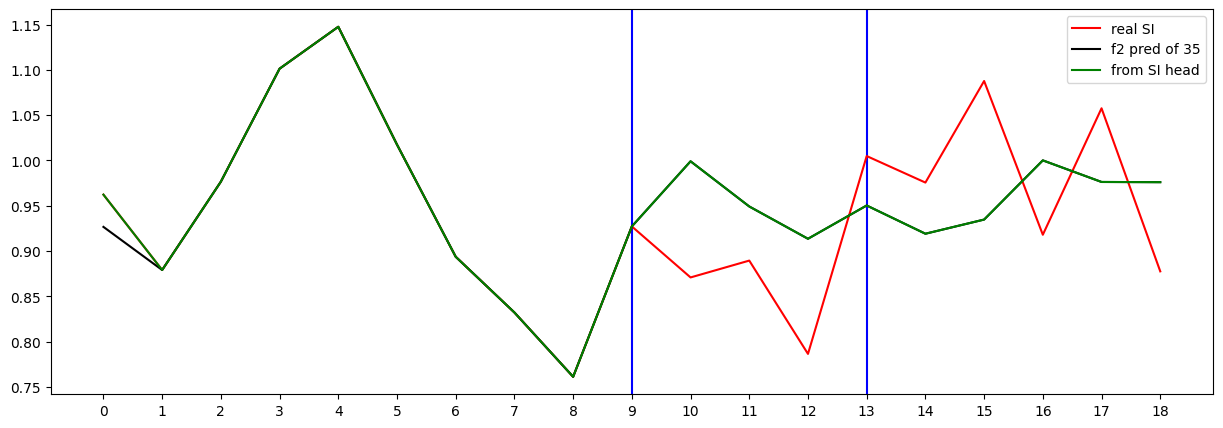

Testing R**2 - (all) - (no inputs):  0.9942874116445347
Testing R**2 - (f2) - SI full (no inputs):  -0.25897256497753274
Testing R**2 - SI head only (no inputs):  -0.25897256497753274
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.476343800196109
3 ...t step R**2 (no inputs):  -0.10119325511232558
4 ...t step R**2 (no inputs):  0.3375099164428008
5 ...t step R**2 (no inputs):  -0.0413954028864294
6 ...t step R**2 (no inputs):  -0.04997742724820098
7 ...t step R**2 (no inputs):  0.21729717894099743
8 ...t step R**2 (no inputs):  0.43533632838406877
0 ...index R**2 (no inputs):  -0.11094770925195307
1 ...index R**2 (no inputs):  -0.08716550729522132
2 ...index R**2 (no inputs):  -0.25897256497753274
3 ...index R**2 (no inputs):  -1.1579666862619828
4 ...index R**2 (no inputs):  -15.624671447452435
5 ...index R**2 (no inputs):  -3.862595273335467
6 ...index R**2 (no inputs):  -0.38555617179504775
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 .

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )



## Run 2


In [37]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.218451
Loss_SI: 1.3680698871612549 Loss_all: 1.213868260383606
===
[50] Train Loss: 0.318289
Loss_SI: 0.3578328788280487 Loss_all: 0.3060234785079956
===


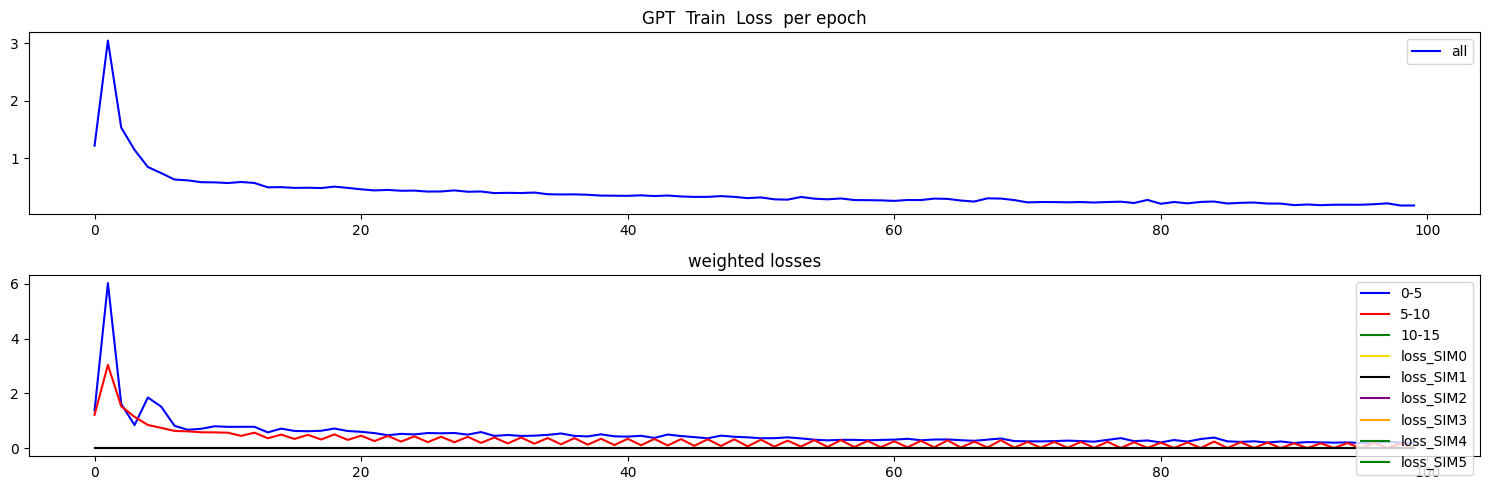

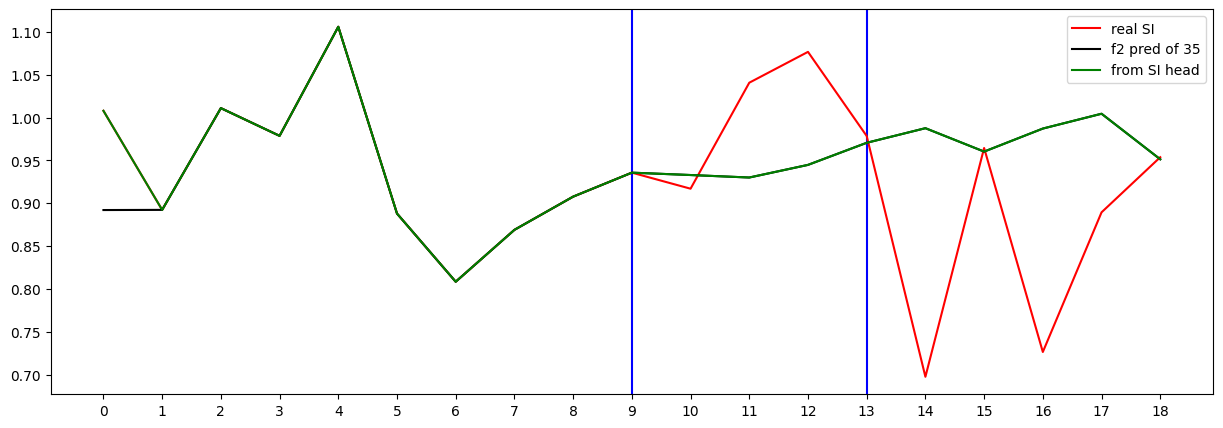

Testing R**2 - (all) - (no inputs):  0.9928237077893561
Testing R**2 - (f2) - SI full (no inputs):  -0.27254022260765365
Testing R**2 - SI head only (no inputs):  -0.27254022260765365
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  0.03639775988805183
1 ...index R**2 (no inputs):  -0.13132064510715824
2 ...index R**2 (no inputs):  -0.27254022260765365
3 ...index R**2 (no inputs):  0.043285200043108096
4 ...index R**2 (no inputs):  -2.46313693113084
5 ...index R**2 (no inputs):  0.22768447936046587
6 ...index R**2 (no inputs):  -8.572972654517995
7 ...index R**2 (no inputs):  0.12883703429245164
8 ...index R**2 (no inp

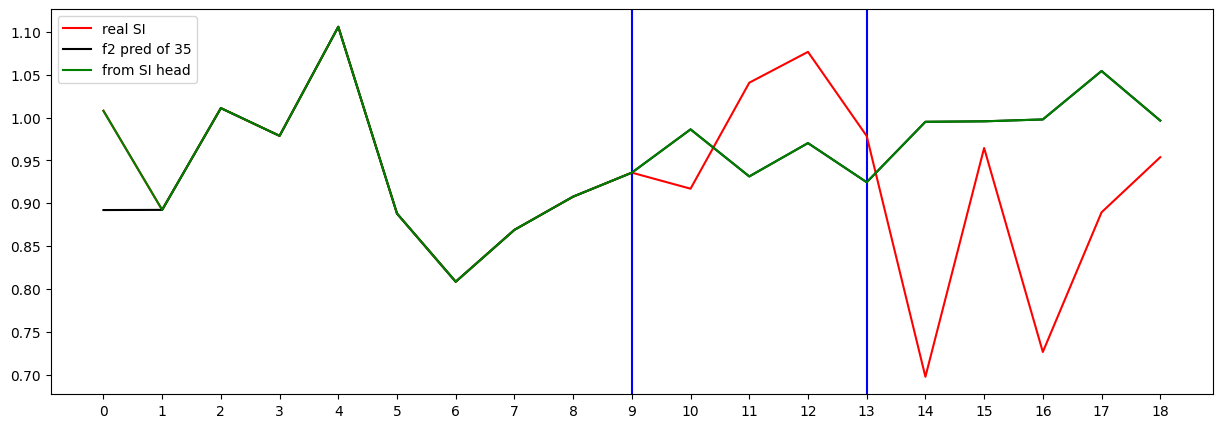

Testing R**2 - (all) - (no inputs):  0.9958570134530191
Testing R**2 - (f2) - SI full (no inputs):  -0.2139617227048507
Testing R**2 - SI head only (no inputs):  -0.2139617227048507
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  0.16974643209656937
1 ...index R**2 (no inputs):  0.11567042652436832
2 ...index R**2 (no inputs):  -0.2139617227048507
3 ...index R**2 (no inputs):  0.4773707231557661
4 ...index R**2 (no inputs):  -2.2577313787723243
5 ...index R**2 (no inputs):  0.5587697811754977
6 ...index R**2 (no inputs):  -4.829010985601033
7 ...index R**2 (no inputs):  0.324900292133411
8 ...index R**2 (no inputs):  

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk400to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.188144
Loss_SI: 1.0425232648849487 Loss_all: 1.1826128959655762
===
[50] Train Loss: 0.361732
Loss_SI: 0.4343605041503906 Loss_all: 0.35509777069091797
===


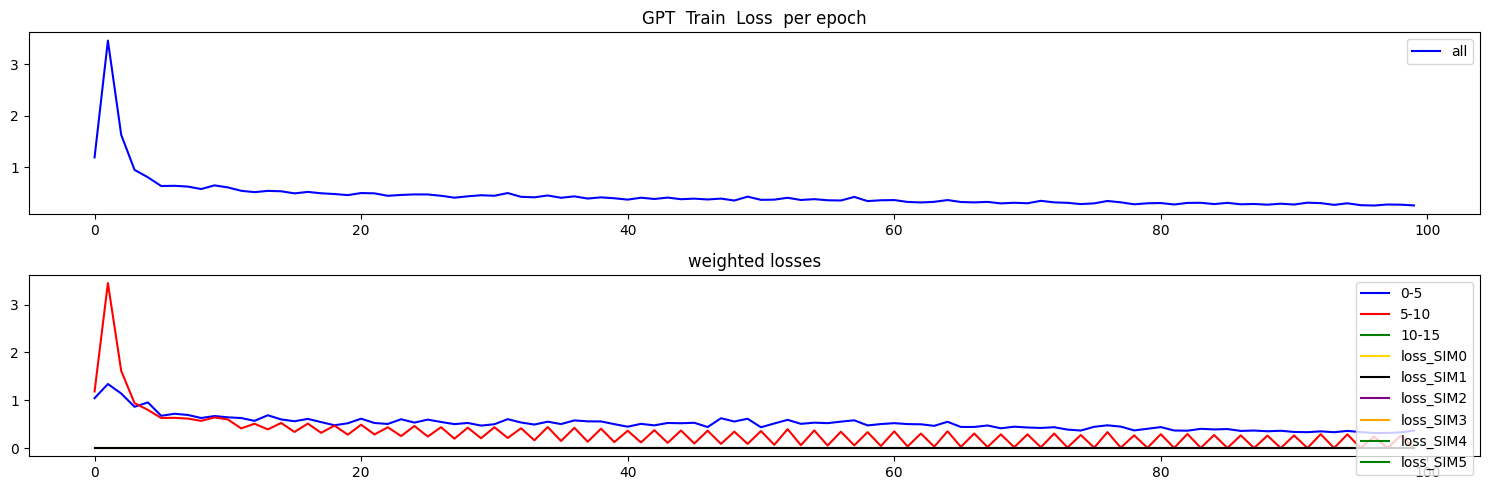

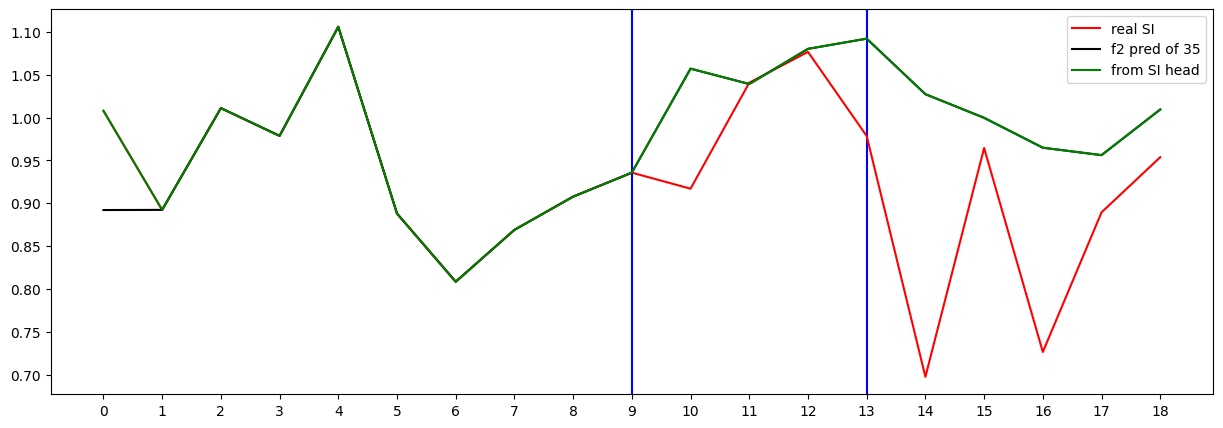

Testing R**2 - (all) - (no inputs):  0.9937849930723887
Testing R**2 - (f2) - SI full (no inputs):  -0.7881844270986074
Testing R**2 - SI head only (no inputs):  -0.7881844270986074
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  0.01773840389115744
1 ...index R**2 (no inputs):  -0.41159923224474837
2 ...index R**2 (no inputs):  -0.7881844270986074
3 ...index R**2 (no inputs):  -0.016717367863917865
4 ...index R**2 (no inputs):  -1.7670699908100604
5 ...index R**2 (no inputs):  0.3314445510410564
6 ...index R**2 (no inputs):  -59.53627668234664
7 ...index R**2 (no inputs):  -0.020167118010224083
8 ...index R**2 (no in

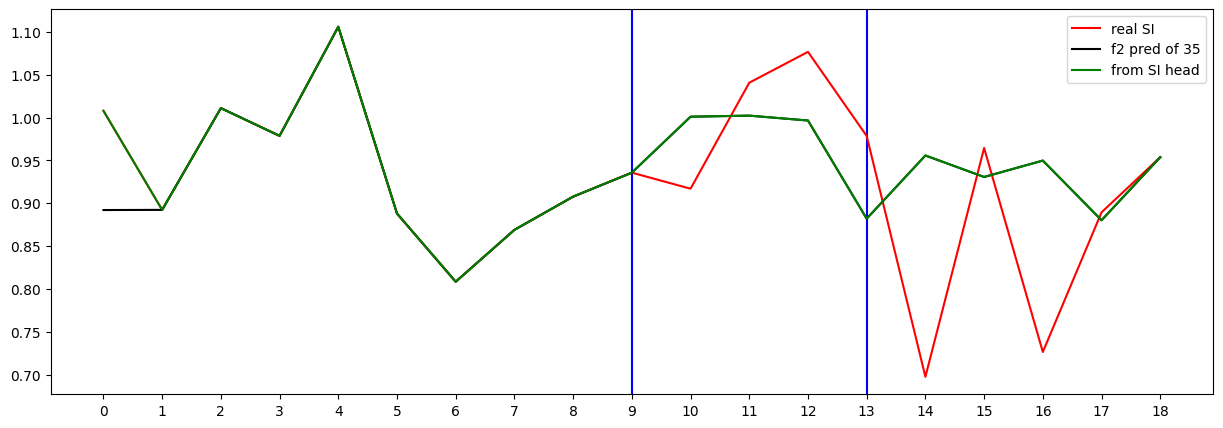

Testing R**2 - (all) - (no inputs):  0.9921162000766435
Testing R**2 - (f2) - SI full (no inputs):  0.324075796704112
Testing R**2 - SI head only (no inputs):  0.324075796704112
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  0.037940530443733245
1 ...index R**2 (no inputs):  -1.9293799965873242
2 ...index R**2 (no inputs):  0.324075796704112
3 ...index R**2 (no inputs):  -0.00045284875032458594
4 ...index R**2 (no inputs):  -6.816954971236824
5 ...index R**2 (no inputs):  0.16073005324850542
6 ...index R**2 (no inputs):  -173.76367020456397
7 ...index R**2 (no inputs):  -0.2670100258135433
8 ...index R**2 (no inputs)

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to500_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.231020
Loss_SI: 1.1316646337509155 Loss_all: 1.2261366844177246
===
[50] Train Loss: 0.348891
Loss_SI: 0.44719788432121277 Loss_all: 0.34269019961357117
===


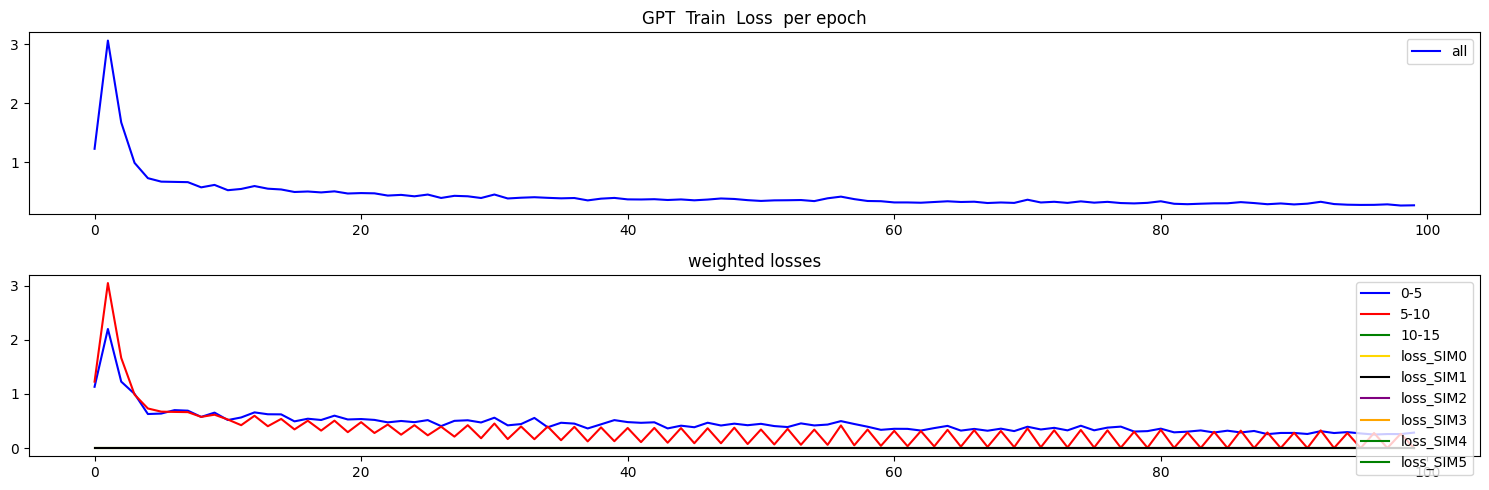

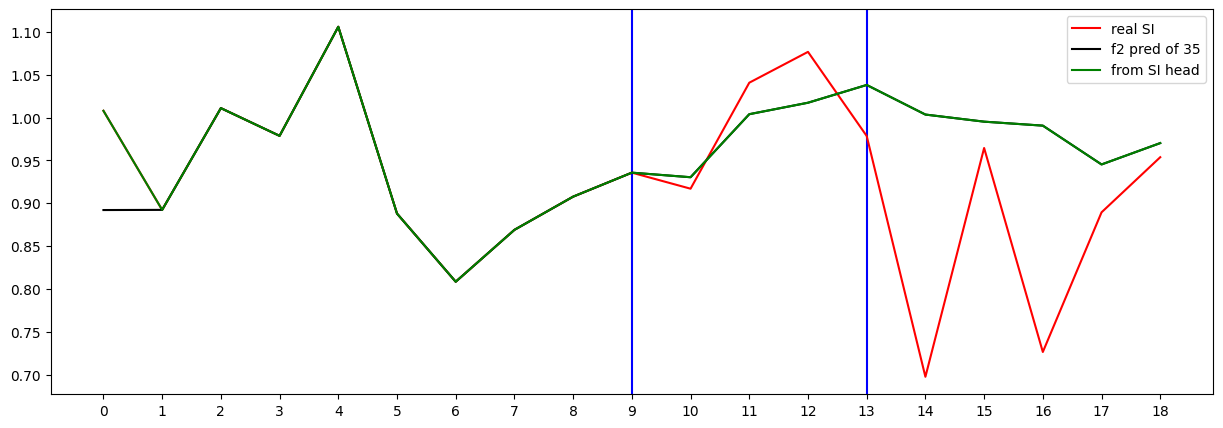

Testing R**2 - (all) - (no inputs):  0.9936449916845603
Testing R**2 - (f2) - SI full (no inputs):  -0.5639660595450855
Testing R**2 - SI head only (no inputs):  -0.5639660595450855
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  0.08416620185210455
1 ...index R**2 (no inputs):  -0.41208595805227466
2 ...index R**2 (no inputs):  -0.5639660595450855
3 ...index R**2 (no inputs):  -1.6586034159152905
4 ...index R**2 (no inputs):  -121.98531130532326
5 ...index R**2 (no inputs):  0.3187661213224483
6 ...index R**2 (no inputs):  -251.344175406029
7 ...index R**2 (no inputs):  -0.2121006110901802
8 ...index R**2 (no inputs)

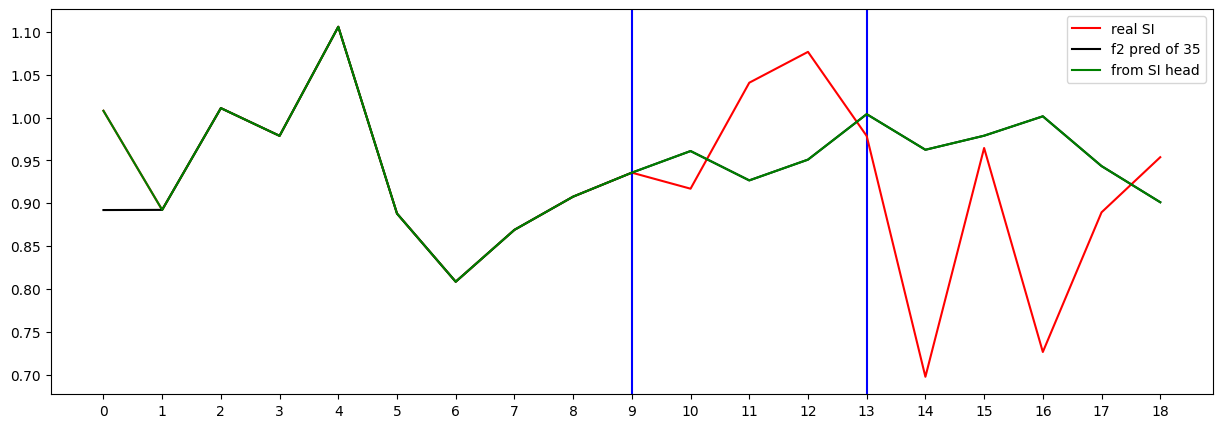

Testing R**2 - (all) - (no inputs):  0.9490758557604666
Testing R**2 - (f2) - SI full (no inputs):  -0.49920811735761794
Testing R**2 - SI head only (no inputs):  -0.49920811735761794
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  -0.25263057782391507
1 ...index R**2 (no inputs):  -0.44646178552120785
2 ...index R**2 (no inputs):  -0.49920811735761794
3 ...index R**2 (no inputs):  -4.657033934391771
4 ...index R**2 (no inputs):  -23.36044038595246
5 ...index R**2 (no inputs):  -4.5202205583922845
6 ...index R**2 (no inputs):  -603.8582074560425
7 ...index R**2 (no inputs):  -0.30326547913184143
8 ...index R**2 (no in

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.190458
Loss_SI: 1.1948776245117188 Loss_all: 1.1856701374053955
===
[50] Train Loss: 0.387860
Loss_SI: 0.47745734453201294 Loss_all: 0.3819636404514313
===


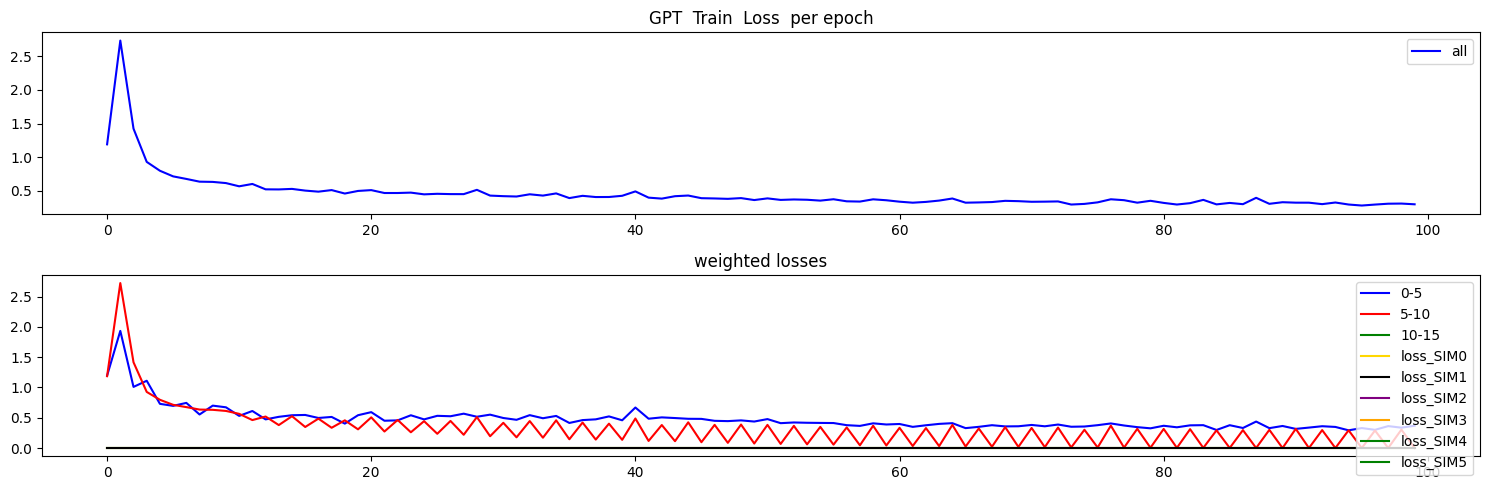

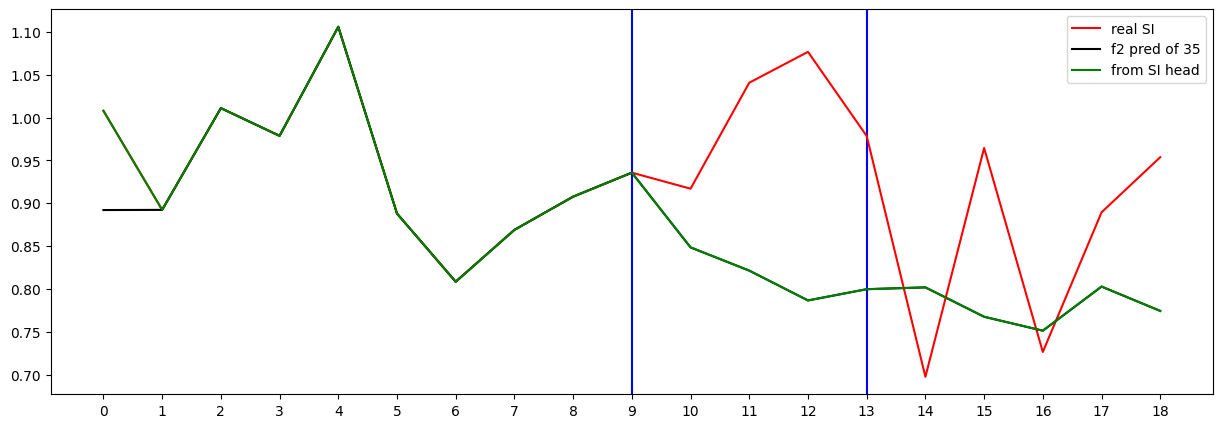

Testing R**2 - (all) - (no inputs):  0.9582401031382224
Testing R**2 - (f2) - SI full (no inputs):  -0.9437616661868513
Testing R**2 - SI head only (no inputs):  -0.9437616661868513
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  -0.46301875286601124
1 ...index R**2 (no inputs):  -0.31394397753518777
2 ...index R**2 (no inputs):  -0.9437616661868513
3 ...index R**2 (no inputs):  -0.5169667902231871
4 ...index R**2 (no inputs):  -30.547534395662453
5 ...index R**2 (no inputs):  -3.510334605477599
6 ...index R**2 (no inputs):  -330.8159600640171
7 ...index R**2 (no inputs):  -0.2517047702468387
8 ...index R**2 (no input

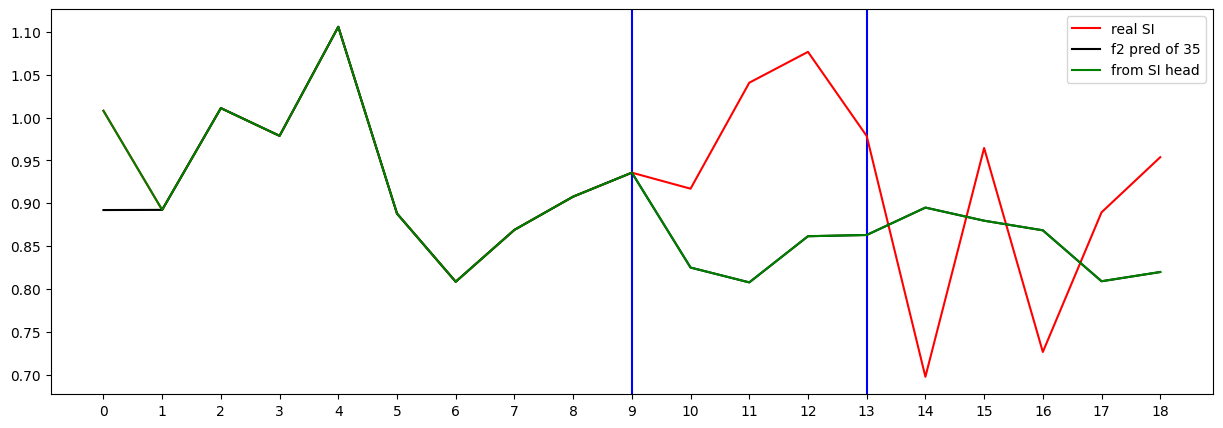

Testing R**2 - (all) - (no inputs):  0.9465445731401039
Testing R**2 - (f2) - SI full (no inputs):  -0.7388657784010437
Testing R**2 - SI head only (no inputs):  -0.7388657784010437
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  -0.24347501606630328
1 ...index R**2 (no inputs):  -1.4803557873625564
2 ...index R**2 (no inputs):  -0.7388657784010437
3 ...index R**2 (no inputs):  0.3384226909866549
4 ...index R**2 (no inputs):  -148.57842145652495
5 ...index R**2 (no inputs):  -4.783648312430864
6 ...index R**2 (no inputs):  -425.0146541766834
7 ...index R**2 (no inputs):  -0.13767188033920807
8 ...index R**2 (no inputs

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs, 9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )



[0] Train Loss: 1.161973
Loss_SI: 1.100206732749939 Loss_all: 1.1564714908599854
===
[50] Train Loss: 0.334782
Loss_SI: 0.3684118092060089 Loss_all: 0.33116114139556885
===


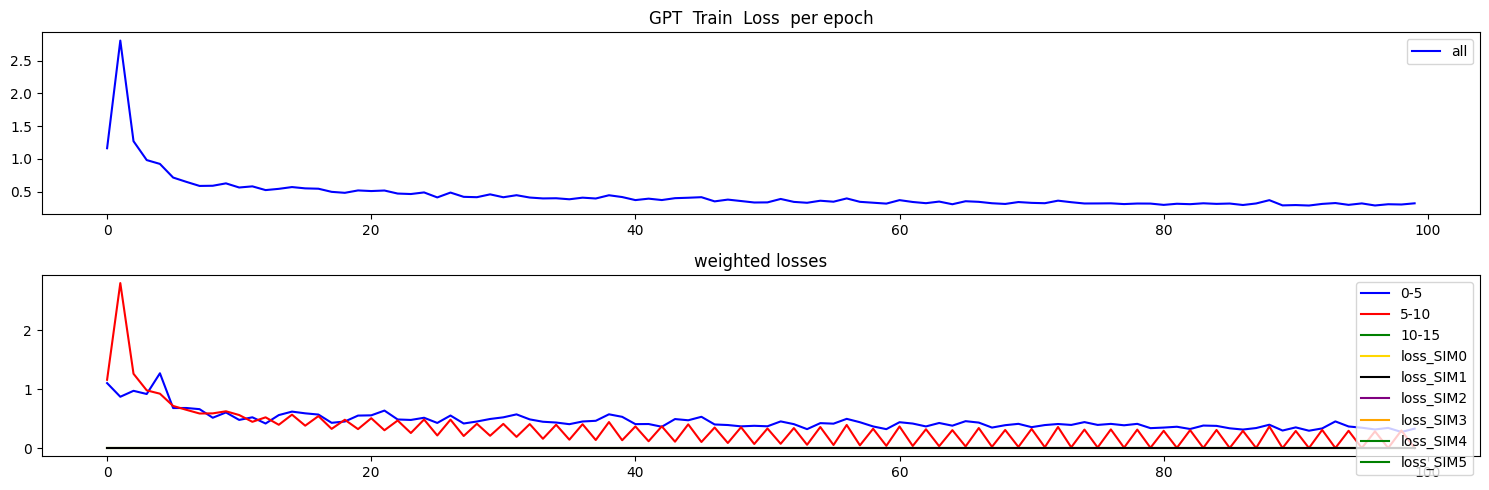

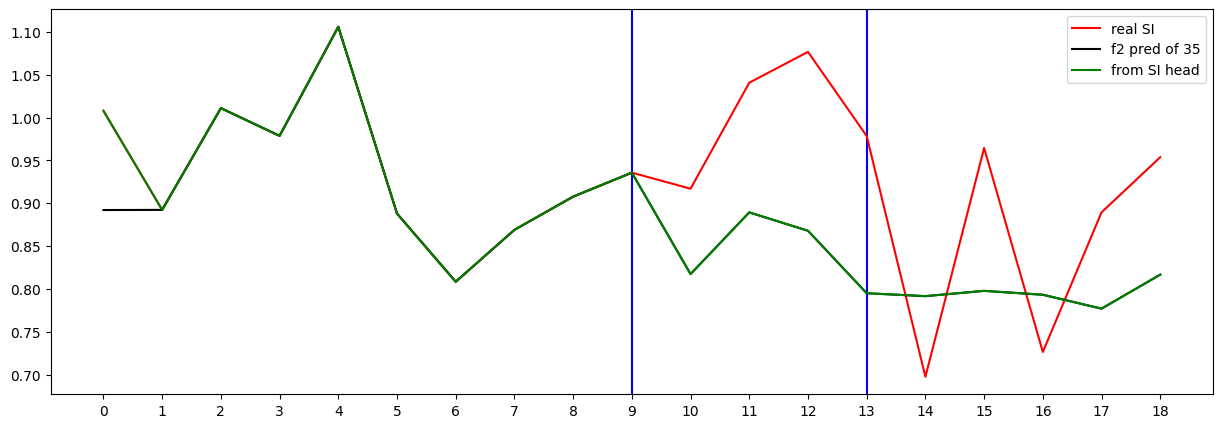

Testing R**2 - (all) - (no inputs):  0.965951555456457
Testing R**2 - (f2) - SI full (no inputs):  -0.5519518385005424
Testing R**2 - SI head only (no inputs):  -0.5519518385005424
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  -0.1539421672471415
1 ...index R**2 (no inputs):  0.13765507281219946
2 ...index R**2 (no inputs):  -0.5519518385005424
3 ...index R**2 (no inputs):  -1.0172125547807105
4 ...index R**2 (no inputs):  -71.2859347279755
5 ...index R**2 (no inputs):  -2.186665638861039
6 ...index R**2 (no inputs):  -195.65430231630404
7 ...index R**2 (no inputs):  -0.11626884003476312
8 ...index R**2 (no inputs):

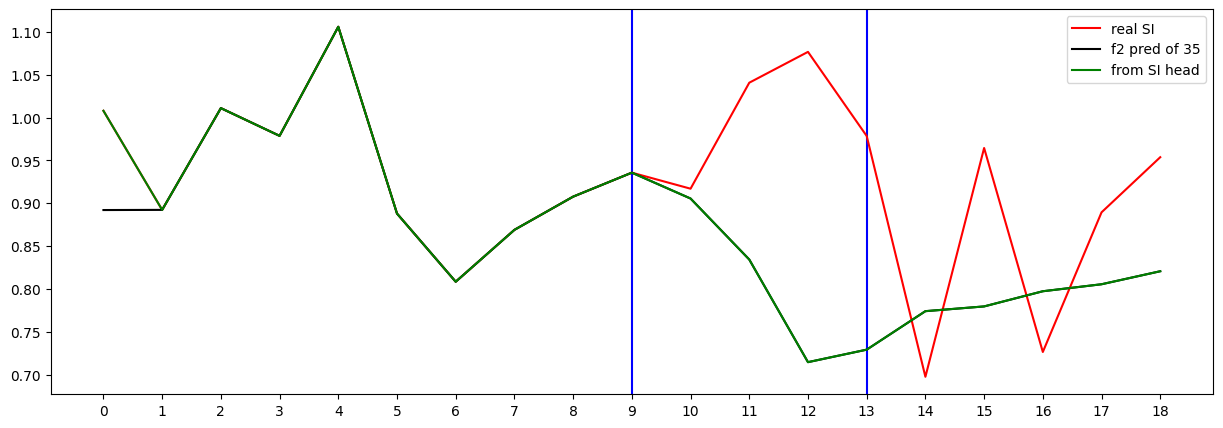

Testing R**2 - (all) - (no inputs):  0.8375152627811248
Testing R**2 - (f2) - SI full (no inputs):  -0.7898730777544571
Testing R**2 - SI head only (no inputs):  -0.7898730777544571
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.0000052941439628
3 ...t step R**2 (no inputs):  -1.0098819138618103
4 ...t step R**2 (no inputs):  -0.3414596543794599
5 ...t step R**2 (no inputs):  -1.3988833219008305
6 ...t step R**2 (no inputs):  -0.5200483491789716
7 ...t step R**2 (no inputs):  -0.44911012206442824
8 ...t step R**2 (no inputs):  -0.4567595152508357
0 ...index R**2 (no inputs):  -0.10764524102315498
1 ...index R**2 (no inputs):  0.2974088177135634
2 ...index R**2 (no inputs):  -0.7898730777544571
3 ...index R**2 (no inputs):  -4.492163798354548
4 ...index R**2 (no inputs):  -33.008055701581284
5 ...index R**2 (no inputs):  -15.733717126753838
6 ...index R**2 (no inputs):  -543.3738610720804
7 ...index R**2 (no inputs):  -0.1732752048115478
8 ...index R**2 (no inputs)

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to500_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )



## Run 3


In [43]:

chunk400to500_train, chunk300to500_train, chunk200to500_train, chunk100to500_train, chunk000to500_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.200229
Loss_SI: 1.462546944618225 Loss_all: 1.1929038763046265
===
[50] Train Loss: 0.351168
Loss_SI: 0.2798459231853485 Loss_all: 0.34596043825149536
===


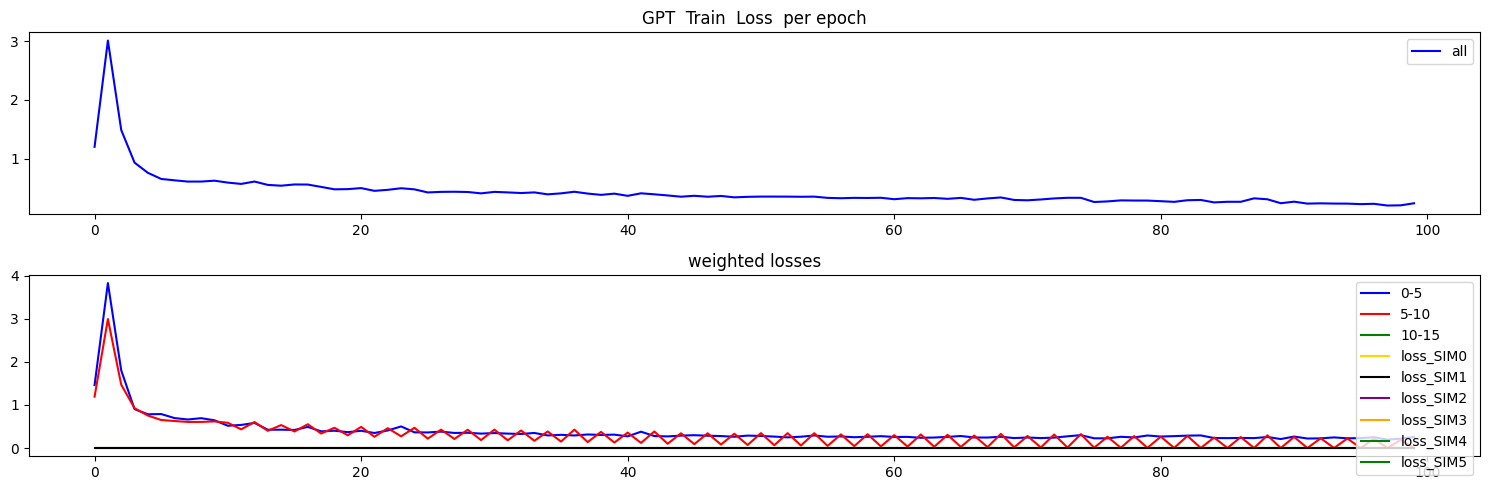

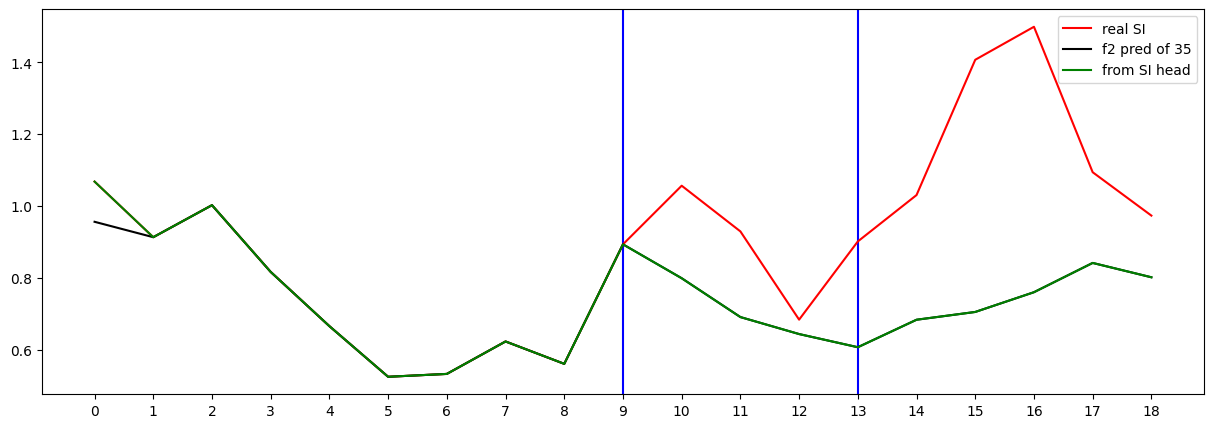

Testing R**2 - (all) - (no inputs):  0.5531136926113633
Testing R**2 - (f2) - SI full (no inputs):  -2.192780806344133
Testing R**2 - SI head only (no inputs):  -2.192780806344133
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507561249349
6 ...t step R**2 (no inputs):  0.5639234453470223
7 ...t step R**2 (no inputs):  0.5506046715234887
8 ...t step R**2 (no inputs):  0.5794390923610323
0 ...index R**2 (no inputs):  0.10046570303231239
1 ...index R**2 (no inputs):  -7.583777603272061
2 ...index R**2 (no inputs):  -2.192780806344133
3 ...index R**2 (no inputs):  -1.092323462823066
4 ...index R**2 (no inputs):  -0.9413381975648261
5 ...index R**2 (no inputs):  -11.487859229252155
6 ...index R**2 (no inputs):  -1.668525031119858
7 ...index R**2 (no inputs):  -18.643920329512866
8 ...index R**2 (no inputs):  0.0
9

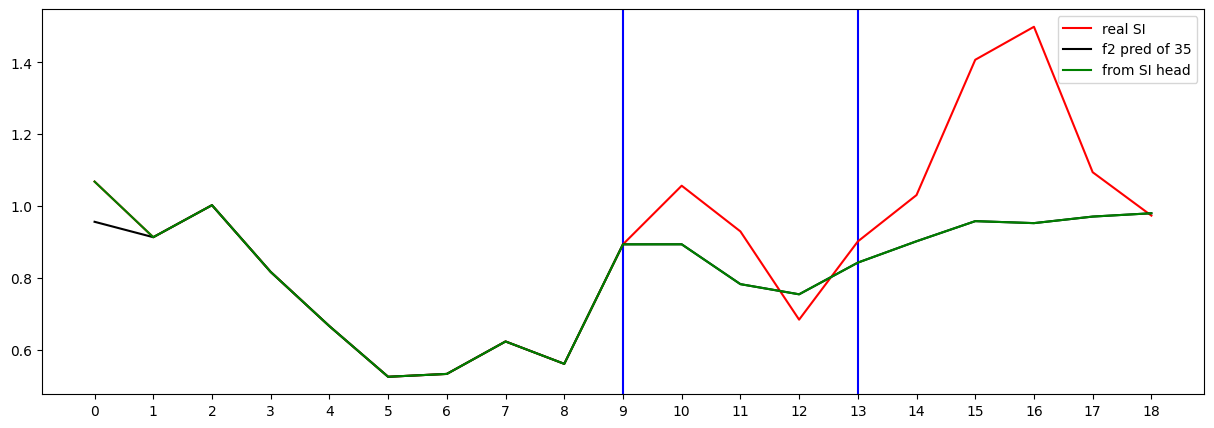

Testing R**2 - (all) - (no inputs):  0.46986859289911365
Testing R**2 - (f2) - SI full (no inputs):  -0.2716637254965524
Testing R**2 - SI head only (no inputs):  -0.2716637254965524
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507561249349
6 ...t step R**2 (no inputs):  0.5639234453470223
7 ...t step R**2 (no inputs):  0.5506046715234887
8 ...t step R**2 (no inputs):  0.5794390923610323
0 ...index R**2 (no inputs):  -0.00613382209729374
1 ...index R**2 (no inputs):  -4.2197449730083845
2 ...index R**2 (no inputs):  -0.2716637254965524
3 ...index R**2 (no inputs):  -0.8955699932092855
4 ...index R**2 (no inputs):  -1.0395042745647087
5 ...index R**2 (no inputs):  -13.814785909733278
6 ...index R**2 (no inputs):  -3.1273451293387247
7 ...index R**2 (no inputs):  -26.317622253304414
8 ...index R**2 (no inputs)

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk400to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_400to500.append( res_real )
inferenceGPT_obj.all_pred_si_400to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk400to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_400to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_400to500.append( res_pred )


[0] Train Loss: 1.248720
Loss_SI: 1.4283291101455688 Loss_all: 1.2422007322311401
===
[50] Train Loss: 0.406778
Loss_SI: 0.42982426285743713 Loss_all: 0.40148428082466125
===


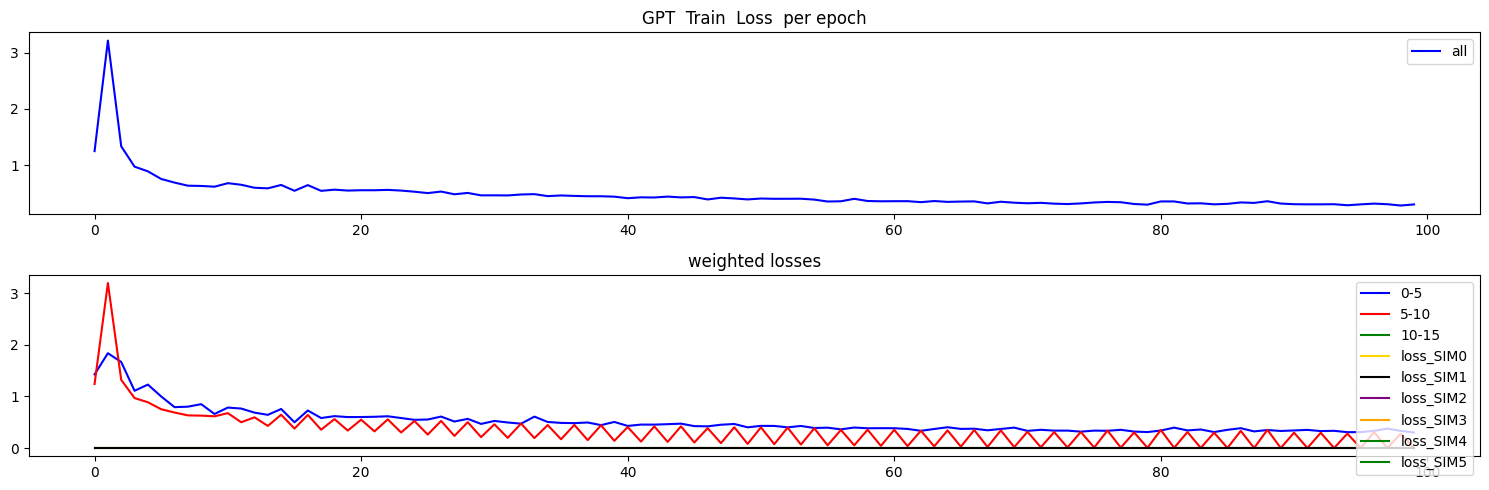

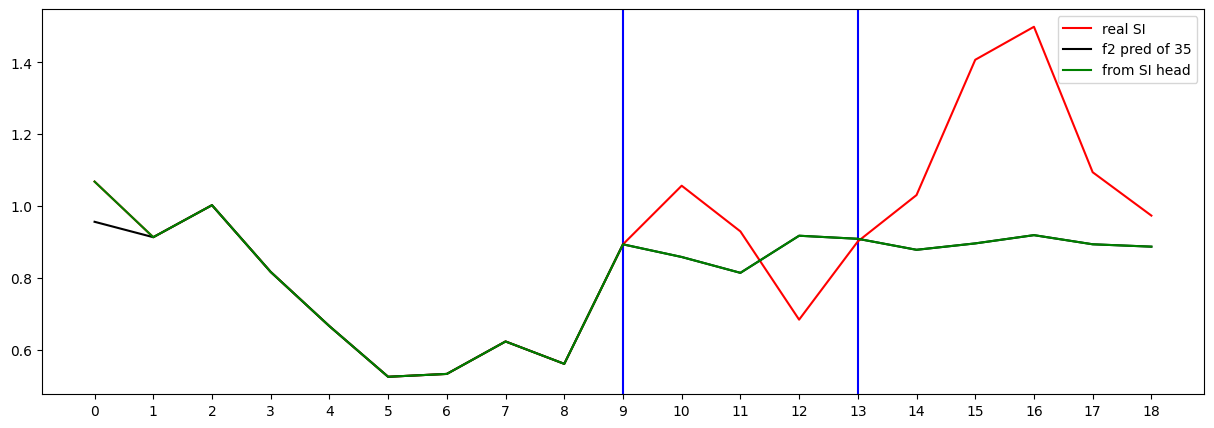

Testing R**2 - (all) - (no inputs):  0.9624057930316744
Testing R**2 - (f2) - SI full (no inputs):  -0.48200255692173477
Testing R**2 - SI head only (no inputs):  -0.48200255692173477
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507622896052
6 ...t step R**2 (no inputs):  0.563923413447952
7 ...t step R**2 (no inputs):  0.5506047158717777
8 ...t step R**2 (no inputs):  0.5794391537846806
0 ...index R**2 (no inputs):  0.08379054926522533
1 ...index R**2 (no inputs):  -6.240275830637329
2 ...index R**2 (no inputs):  -0.48200255692173477
3 ...index R**2 (no inputs):  -0.16001493729425142
4 ...index R**2 (no inputs):  -1.0861615646134908
5 ...index R**2 (no inputs):  -0.030301844392855992
6 ...index R**2 (no inputs):  -0.3883755400014355
7 ...index R**2 (no inputs):  -14.238308390235353
8 ...index R**2 (no input

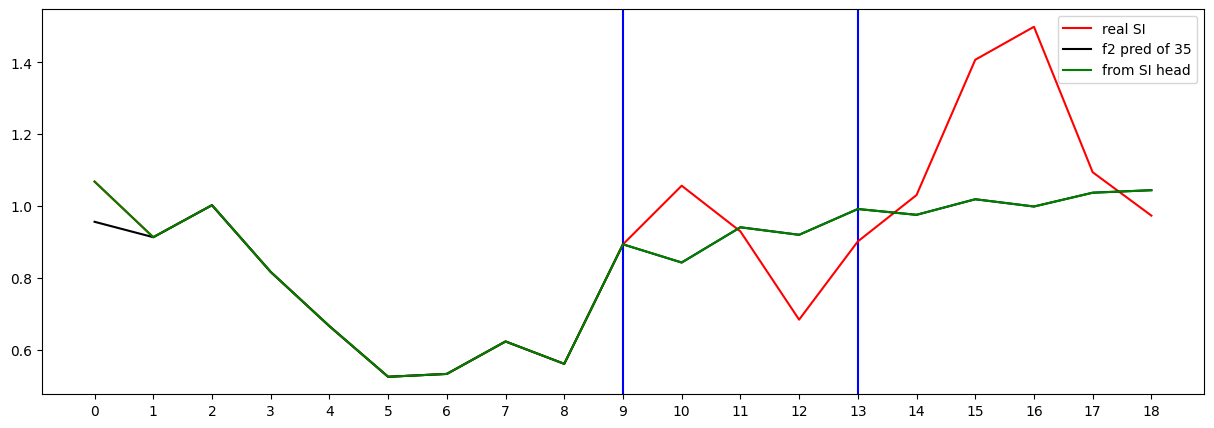

Testing R**2 - (all) - (no inputs):  0.9646893434640913
Testing R**2 - (f2) - SI full (no inputs):  0.000771181801601406
Testing R**2 - SI head only (no inputs):  0.000771181801601406
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507622896052
6 ...t step R**2 (no inputs):  0.563923413447952
7 ...t step R**2 (no inputs):  0.5506047158717777
8 ...t step R**2 (no inputs):  0.5794391537846806
0 ...index R**2 (no inputs):  -0.14284211045596407
1 ...index R**2 (no inputs):  -4.1349911589347865
2 ...index R**2 (no inputs):  0.000771181801601406
3 ...index R**2 (no inputs):  -0.1544261116954555
4 ...index R**2 (no inputs):  -1.2933964116874845
5 ...index R**2 (no inputs):  0.031764664402335496
6 ...index R**2 (no inputs):  -0.5035406630558528
7 ...index R**2 (no inputs):  -15.742139202856936
8 ...index R**2 (no input

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to500_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_300to500.append( res_real )
inferenceGPT_obj.all_pred_si_300to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_300to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_300to500.append( res_pred )



[0] Train Loss: 1.159698
Loss_SI: 1.0943697690963745 Loss_all: 1.1544629335403442
===
[50] Train Loss: 0.438376
Loss_SI: 0.5167264342308044 Loss_all: 0.43253758549690247
===


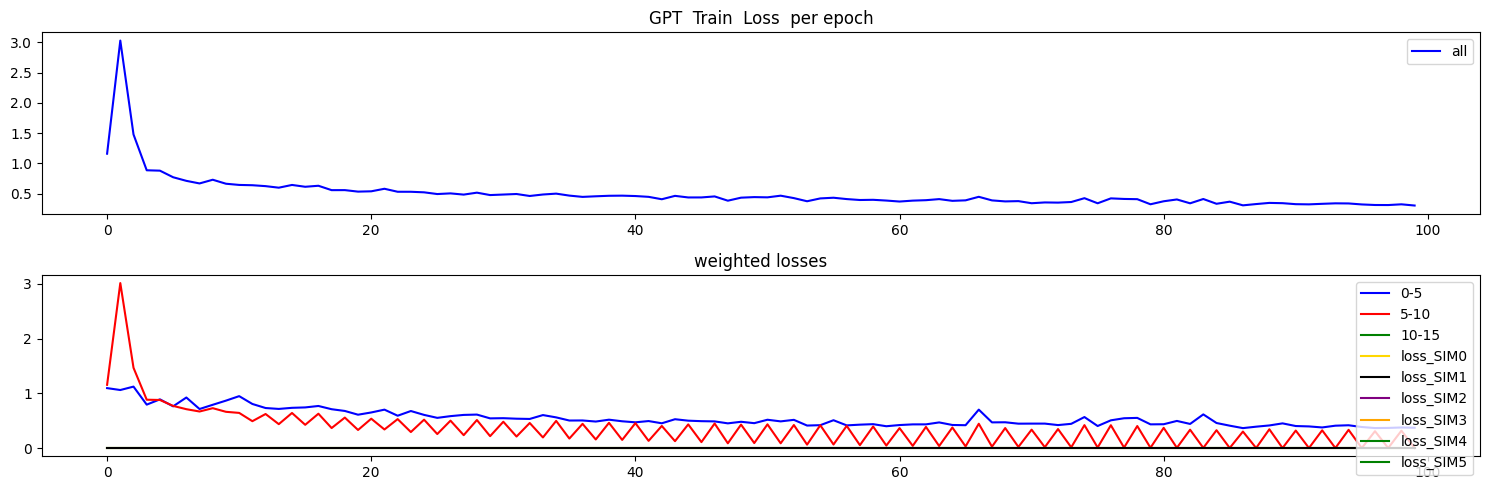

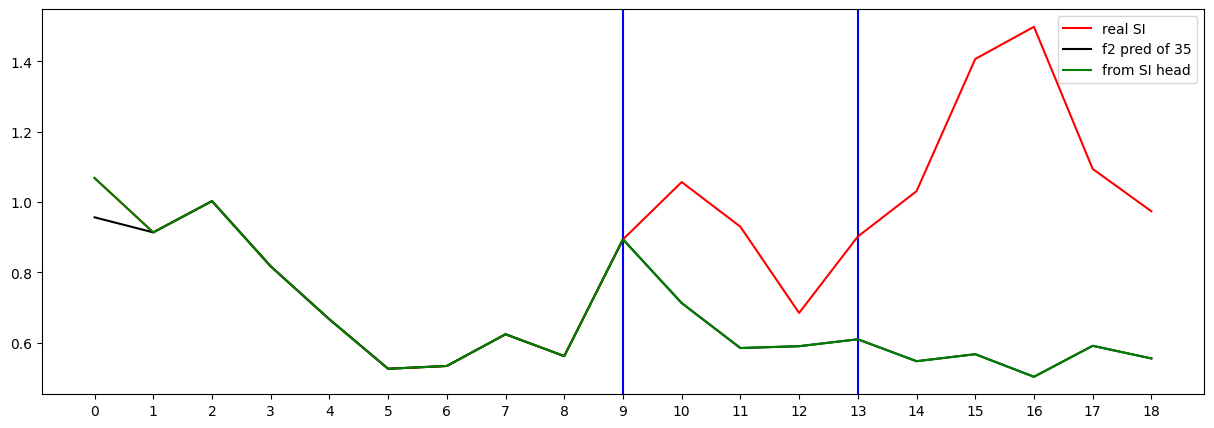

Testing R**2 - (all) - (no inputs):  0.9346693688253104
Testing R**2 - (f2) - SI full (no inputs):  -4.343909083615819
Testing R**2 - SI head only (no inputs):  -4.343909083615819
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507622896052
6 ...t step R**2 (no inputs):  0.563923413447952
7 ...t step R**2 (no inputs):  0.5506047158717777
8 ...t step R**2 (no inputs):  0.5794391537846806
0 ...index R**2 (no inputs):  -0.053025190013714196
1 ...index R**2 (no inputs):  -14.871663377581395
2 ...index R**2 (no inputs):  -4.343909083615819
3 ...index R**2 (no inputs):  -1.6014908861222645
4 ...index R**2 (no inputs):  -0.6931108824007481
5 ...index R**2 (no inputs):  -0.8048231988849188
6 ...index R**2 (no inputs):  -0.5532232066384781
7 ...index R**2 (no inputs):  -7.916145272473603
8 ...index R**2 (no inputs):  0.

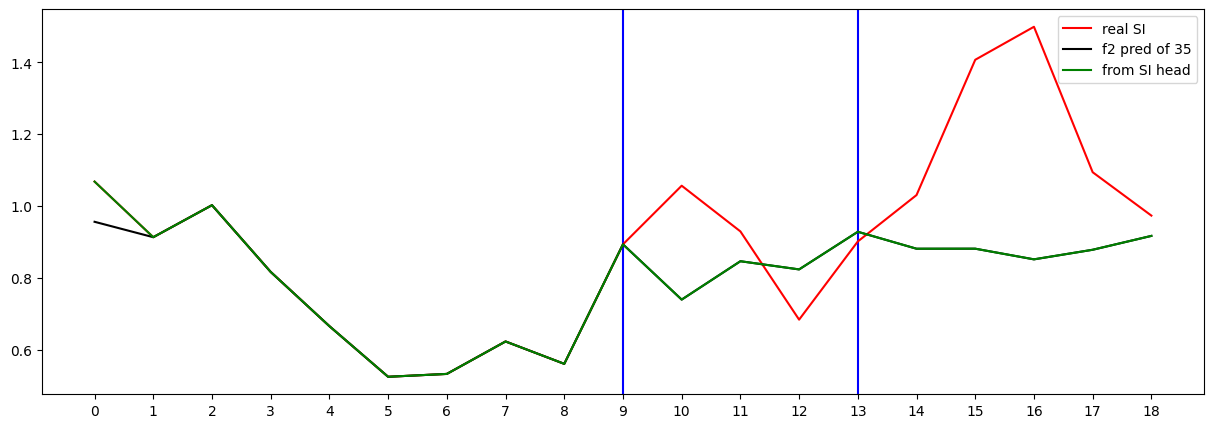

Testing R**2 - (all) - (no inputs):  0.9565947106423898
Testing R**2 - (f2) - SI full (no inputs):  -0.6350911167084818
Testing R**2 - SI head only (no inputs):  -0.6350911167084818
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507622896052
6 ...t step R**2 (no inputs):  0.563923413447952
7 ...t step R**2 (no inputs):  0.5506047158717777
8 ...t step R**2 (no inputs):  0.5794391537846806
0 ...index R**2 (no inputs):  -0.4707559234211349
1 ...index R**2 (no inputs):  -6.714257943592753
2 ...index R**2 (no inputs):  -0.6350911167084818
3 ...index R**2 (no inputs):  -0.009791228137593366
4 ...index R**2 (no inputs):  -1.5303968816147595
5 ...index R**2 (no inputs):  -0.19238525721640065
6 ...index R**2 (no inputs):  -0.15165607005699
7 ...index R**2 (no inputs):  -9.955217861660847
8 ...index R**2 (no inputs):  0

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


inferenceGPT_obj.all_real_si_200to500.append( res_real )
inferenceGPT_obj.all_pred_si_200to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9 )
    inferenceGPT_obj.DPO_all_real_si_200to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_200to500.append( res_pred )


[0] Train Loss: 1.385941
Loss_SI: 1.5565693378448486 Loss_all: 1.3812440633773804
===
[50] Train Loss: 0.447681
Loss_SI: 0.5751996636390686 Loss_all: 0.44365832209587097
===


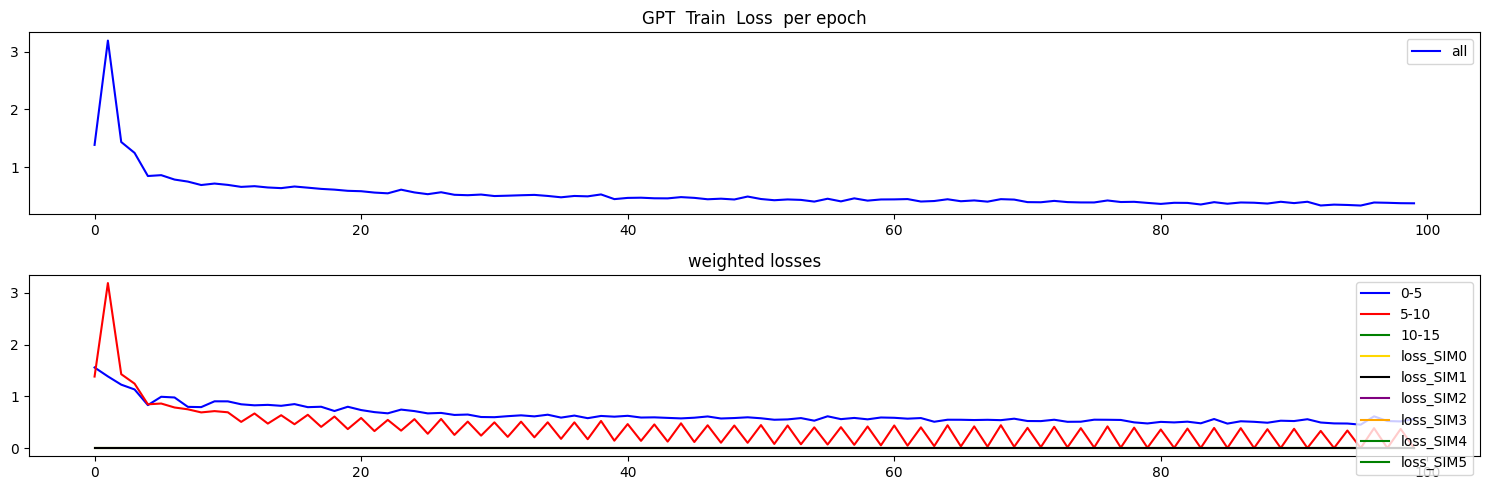

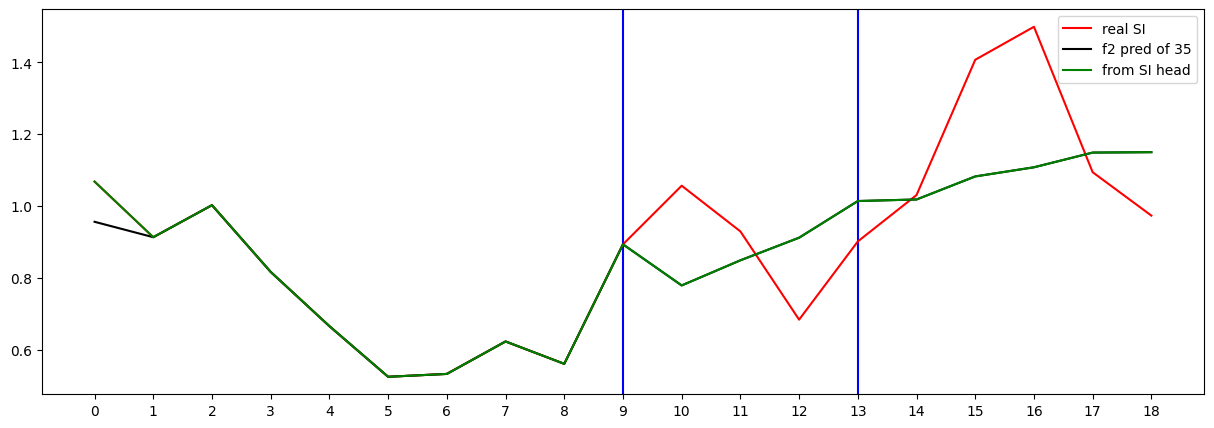

Testing R**2 - (all) - (no inputs):  0.9734449866819304
Testing R**2 - (f2) - SI full (no inputs):  0.18489868457383707
Testing R**2 - SI head only (no inputs):  0.18489868457383707
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507684542729
6 ...t step R**2 (no inputs):  0.5639233196639097
7 ...t step R**2 (no inputs):  0.5506046681037284
8 ...t step R**2 (no inputs):  0.5794391212991868
0 ...index R**2 (no inputs):  -0.08669691989483264
1 ...index R**2 (no inputs):  -3.543585271299487
2 ...index R**2 (no inputs):  0.18489868457383707
3 ...index R**2 (no inputs):  0.0890539480507404
4 ...index R**2 (no inputs):  -1.1076865770588022
5 ...index R**2 (no inputs):  0.2746868093636241
6 ...index R**2 (no inputs):  -0.5209702299963157
7 ...index R**2 (no inputs):  -10.596282858682079
8 ...index R**2 (no inputs):  0

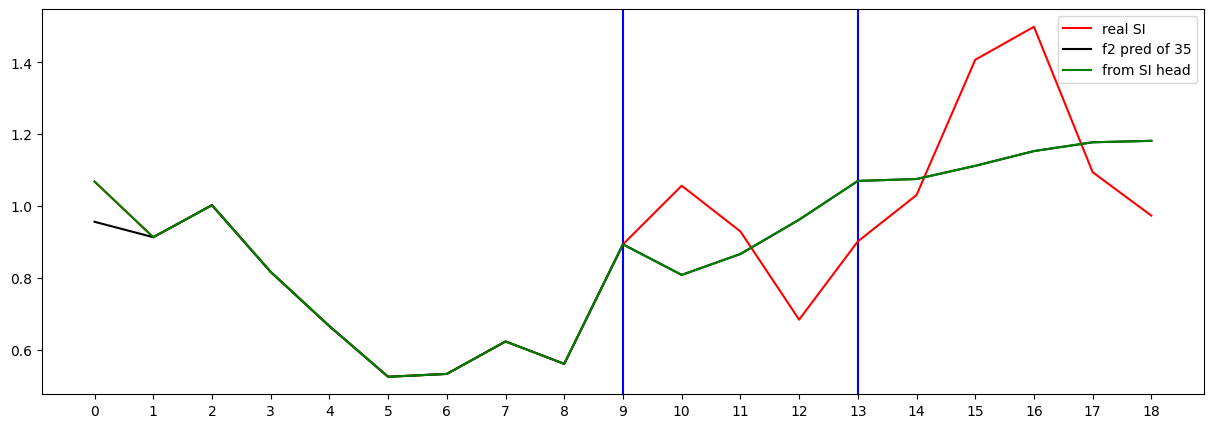

Testing R**2 - (all) - (no inputs):  0.9495620442835819
Testing R**2 - (f2) - SI full (no inputs):  0.26681027393976253
Testing R**2 - SI head only (no inputs):  0.26681027393976253
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507684542729
6 ...t step R**2 (no inputs):  0.5639233196639097
7 ...t step R**2 (no inputs):  0.5506046681037284
8 ...t step R**2 (no inputs):  0.5794391212991868
0 ...index R**2 (no inputs):  -0.17111558675900307
1 ...index R**2 (no inputs):  -2.670733664041948
2 ...index R**2 (no inputs):  0.26681027393976253
3 ...index R**2 (no inputs):  0.20567535602110687
4 ...index R**2 (no inputs):  -1.3409100400948502
5 ...index R**2 (no inputs):  -0.39261684904336436
6 ...index R**2 (no inputs):  -0.4204267231925114
7 ...index R**2 (no inputs):  -10.931834571619735
8 ...index R**2 (no inputs):

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to500_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_100to500.append( res_real )
inferenceGPT_obj.all_pred_si_100to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_100to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_100to500.append( res_pred )
    
    
    

[0] Train Loss: 1.347666
Loss_SI: 1.3692567348480225 Loss_all: 1.3434220552444458
===
[50] Train Loss: 0.449255
Loss_SI: 0.6086716651916504 Loss_all: 0.44311174750328064
===


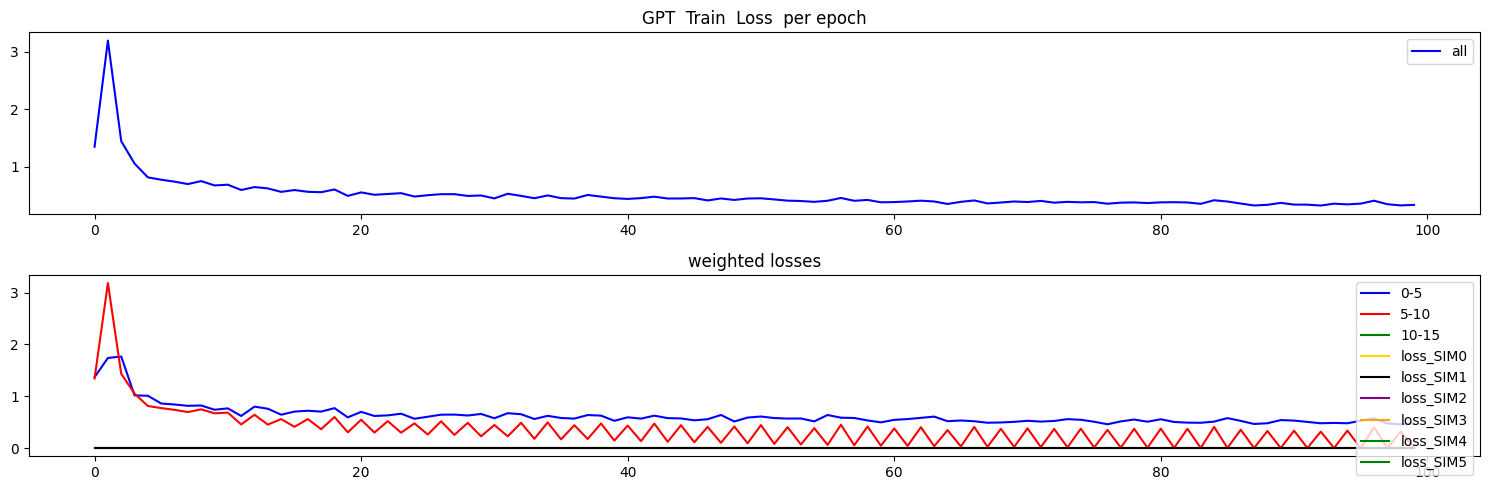

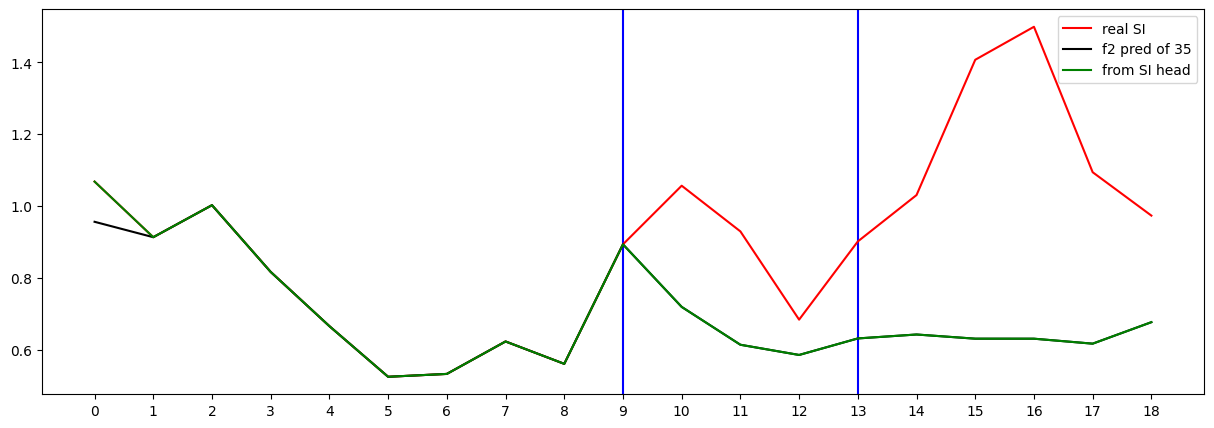

Testing R**2 - (all) - (no inputs):  0.7959625332047121
Testing R**2 - (f2) - SI full (no inputs):  -3.229929965122662
Testing R**2 - SI head only (no inputs):  -3.229929965122662
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507622896052
6 ...t step R**2 (no inputs):  0.563923413447952
7 ...t step R**2 (no inputs):  0.5506047158717777
8 ...t step R**2 (no inputs):  0.5794391537846806
0 ...index R**2 (no inputs):  -0.00933342029176032
1 ...index R**2 (no inputs):  -11.02164637262574
2 ...index R**2 (no inputs):  -3.229929965122662
3 ...index R**2 (no inputs):  -3.2514322661912773
4 ...index R**2 (no inputs):  -0.41386824572558023
5 ...index R**2 (no inputs):  -4.682791160225456
6 ...index R**2 (no inputs):  -1.1168885323036628
7 ...index R**2 (no inputs):  -20.440510402519962
8 ...index R**2 (no inputs):  0.0

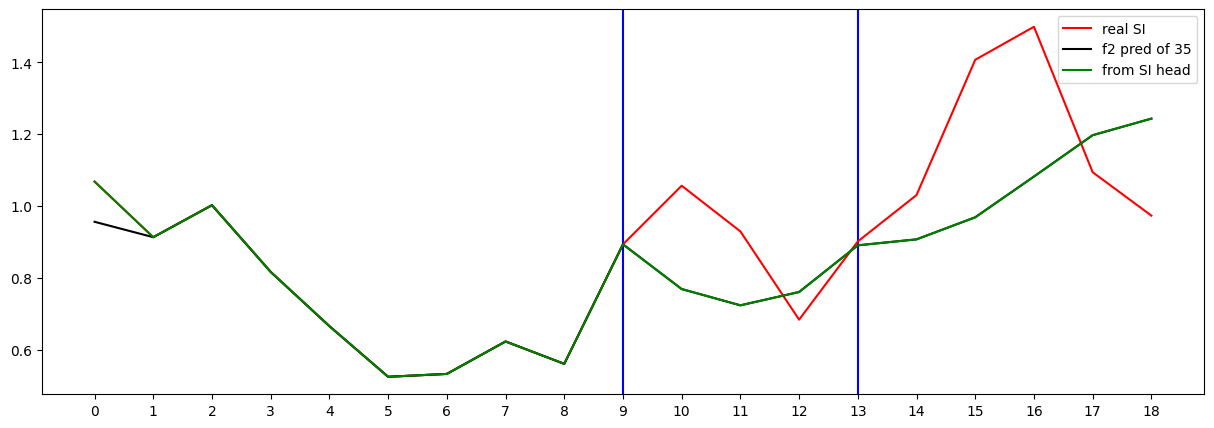

Testing R**2 - (all) - (no inputs):  0.8547812730616757
Testing R**2 - (f2) - SI full (no inputs):  -0.3405758047689804
Testing R**2 - SI head only (no inputs):  -0.3405758047689804
1 ...t step R**2 (no inputs):  nan
2 ...t step R**2 (no inputs):  -1.4631716943921105
3 ...t step R**2 (no inputs):  -1.5657005032158384
4 ...t step R**2 (no inputs):  -0.07651188902026407
5 ...t step R**2 (no inputs):  0.4072507622896052
6 ...t step R**2 (no inputs):  0.563923413447952
7 ...t step R**2 (no inputs):  0.5506047158717777
8 ...t step R**2 (no inputs):  0.5794391537846806
0 ...index R**2 (no inputs):  0.08063081833841568
1 ...index R**2 (no inputs):  -5.273809022236733
2 ...index R**2 (no inputs):  -0.3405758047689804
3 ...index R**2 (no inputs):  -1.6488629163446635
4 ...index R**2 (no inputs):  -0.4322648588087463
5 ...index R**2 (no inputs):  -3.0319909307967787
6 ...index R**2 (no inputs):  -0.7227975259178347
7 ...index R**2 (no inputs):  -24.254227295490892
8 ...index R**2 (no inputs):  0

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to500_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


inferenceGPT_obj.all_real_si_000to500.append( res_real )
inferenceGPT_obj.all_pred_si_000to500.append( res_pred )

if inferenceGPT_obj.DPOtrain:
    model_DPO = inferenceGPT_obj.DPO_RLHF( si_GPT )         ## DPO with preferences
    res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to500_train, test_CIVS, model_DPO, x_means, x_standard_devs,  9  )
    inferenceGPT_obj.DPO_all_real_si_000to500.append( res_real )
    inferenceGPT_obj.DPO_all_pred_si_000to500.append( res_pred )




## R2 over accumulated Runs


In [49]:

inferenceGPT_obj.print_ALL_R2s_THE_END()

inferenceGPT_obj.DPO_print_ALL_R2s_THE_END()


====================================400to500
1 400to500...1.....................R² on first n steps - R²: -1.4277601897744745
Naive_R2:....................................R²: 0.1529
..A..400to500..1Naive_R2:....................................R² 0.152912437915802
RMSE:0.0996,MAE:0.0908,MASE:0.6934
1 400to500...1.......................R² on just step n - R²: -1.4277601897744745
Naive_R2:....................................R²: 0.1529
..B..400to500..1Naive_R2:....................................R² 0.152912437915802
RMSE:0.0996,MAE:0.0908,MASE:0.6934
2 400to500...2.....................R² on first n steps - R²: 0.23838200250431485
Naive_R2:....................................R²: 0.4645
..A..400to500..2Naive_R2:....................................R² 0.4644778370857239
RMSE:0.1188,MAE:0.1015,MASE:0.6464
2 400to500...2.......................R² on just step n - R²: 0.3354664230142691
Naive_R2:....................................R²: 0.7688
..B..400to500..2Naive_R2:...............................

In [50]:

summary = inferenceGPT_obj.summarize_eval_log()


pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


summary


Metric  \
0         400to500...1.....................R² on first n steps - R²:   
1    ..A..400to500..1Naive_R2:....................................R²   
2                                         ..A..400to500..1...RMSE...   
3                                          ..A..400to500..1...MAE...   
4                                         ..A..400to500..1...MASE...   
5         400to500...1.......................R² on just step n - R²:   
6    ..B..400to500..1Naive_R2:....................................R²   
7                                         ..B..400to500..1...RMSE...   
8                                          ..B..400to500..1...MAE...   
9                                         ..B..400to500..1...MASE...   
10        400to500...2.....................R² on first n steps - R²:   
11   ..A..400to500..2Naive_R2:....................................R²   
12                                        ..A..400to500..2...RMSE...   
13                                         ..A..400to500..2...MAE...   
14                                        ..A..400to500..2...MASE...   
15        400to500...2.......................R² on just step n - R²:   
16   ..B..400to500..2Naive_R2:....................................R²   
17                                        ..B..400to500..2...RMSE...   
18                                         ..B..400to500..2...MAE...   
19                                        ..B..400to500..2...MASE...   
20        400to500...3.....................R² on first n steps - R²:   
21   ..A..400to500..3Naive_R2:....................................R²   
22                                        ..A..400to500..3...RMSE...   
23                                         ..A..400to500..3...MAE...   
24                                        ..A..400to500..3...MASE...   
25        400to500...3.......................R² on just step n - R²:   
26   ..B..400to500..3Naive_R2:....................................R²   
27                                        ..B..400to500..3...RMSE...   
28                                         ..B..400to500..3...MAE...   
29                                        ..B..400to500..3...MASE...   
30        400to500...4.....................R² on first n steps - R²:   
31   ..A..400to500..4Naive_R2:....................................R²   
32                                        ..A..400to500..4...RMSE...   
33                                         ..A..400to500..4...MAE...   
34                                        ..A..400to500..4...MASE...   
35        400to500...4.......................R² on just step n - R²:   
36   ..B..400to500..4Naive_R2:....................................R²   
37                                        ..B..400to500..4...RMSE...   
38                                         ..B..400to500..4...MAE...   
39                                        ..B..400to500..4...MASE...   
40        400to500...5.....................R² on first n steps - R²:   
41   ..A..400to500..5Naive_R2:....................................R²   
42                                        ..A..400to500..5...RMSE...   
43                                         ..A..400to500..5...MAE...   
44                                        ..A..400to500..5...MASE...   
45        400to500...5.......................R² on just step n - R²:   
46   ..B..400to500..5Naive_R2:....................................R²   
47                                        ..B..400to500..5...RMSE...   
48                                         ..B..400to500..5...MAE...   
49                                        ..B..400to500..5...MASE...   
50        400to500...6.....................R² on first n steps - R²:   
51   ..A..400to500..6Naive_R2:....................................R²   
52                                        ..A..400to500..6...RMSE...   
53                                         ..A..400to500..6...MAE...   
54                                        ..A..400to500..6...MASE...   
55        400to500...6........

In [51]:

df = summary

# Assuming your DataFrame is called `df` and has a column named "Better"
total_rows = len(df)
after_wins = (df["Better"] == "After").sum()

percent_after = 100 * after_wins / total_rows

print(f"✅ 'After' was better in {after_wins} out of {total_rows} rows.")
print(f"📊 That’s {percent_after:.2f}% of the metrics.")



✅ 'After' was better in 356 out of 450 rows.
📊 That’s 79.11% of the metrics.



## Post Analysis


In [52]:

import metricsPOSTdebriefDF

metricsPOSTdebriefDF.metricsPOSTdebrief_main(df)


400to500...1 to 4
✅ 'After' was better in 35 out of 40 rows.
📊 That’s 87.50% of the metrics.
400to500...5 to 9
✅ 'After' was better in 50 out of 50 rows.
📊 That’s 100.00% of the metrics.
300to500...1 to 4
✅ 'After' was better in 15 out of 40 rows.
📊 That’s 37.50% of the metrics.
300to500...5 to 9
✅ 'After' was better in 45 out of 50 rows.
📊 That’s 90.00% of the metrics.
200to500...1 to 4
✅ 'After' was better in 30 out of 40 rows.
📊 That’s 75.00% of the metrics.
200to500...5 to 9
✅ 'After' was better in 50 out of 50 rows.
📊 That’s 100.00% of the metrics.
100to500...1 to 4
✅ 'After' was better in 5 out of 40 rows.
📊 That’s 12.50% of the metrics.
100to500...5 to 9
✅ 'After' was better in 41 out of 50 rows.
📊 That’s 82.00% of the metrics.
000to500...1 to 4
✅ 'After' was better in 35 out of 40 rows.
📊 That’s 87.50% of the metrics.
000to500...5 to 9
✅ 'After' was better in 50 out of 50 rows.
📊 That’s 100.00% of the metrics.
